<a href="https://colab.research.google.com/github/codebyalaa/codebyalaa/blob/main/Personal_Loan_Pred_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:

Hello! my name is Alaa Alzahrani and This was a finance-related project I did.
* Title: Personal_Loan_Pred_ML.ipynb
* Contact: send2alaa@gmail.com
* Github: codebyalaa

## Personal Loan | US Bank

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

As a Data scientist, I'm going to build a model that will help the marketing department at AllLife bank to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 21.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

RS = 0


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
customers_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mortgage Project /Loan_Modelling.csv')

In [ ]:
data = customers_data.copy()

## Data Overview

In [ ]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [ ]:
data.shape

(5000, 14)

this data set has 5000 rows and 14 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


there are 13 integer columns and 1 float column which is CCAvg.

In [ ]:
data.describe(include='all').T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

the age group of the customers range between 23 to 67.
the average income is about 73,000.


In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

there is no null data.

In [ ]:
data.duplicated().sum()

0

there is no duplicated data.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below to approach the analysis in the right manner and generate insights from the data.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

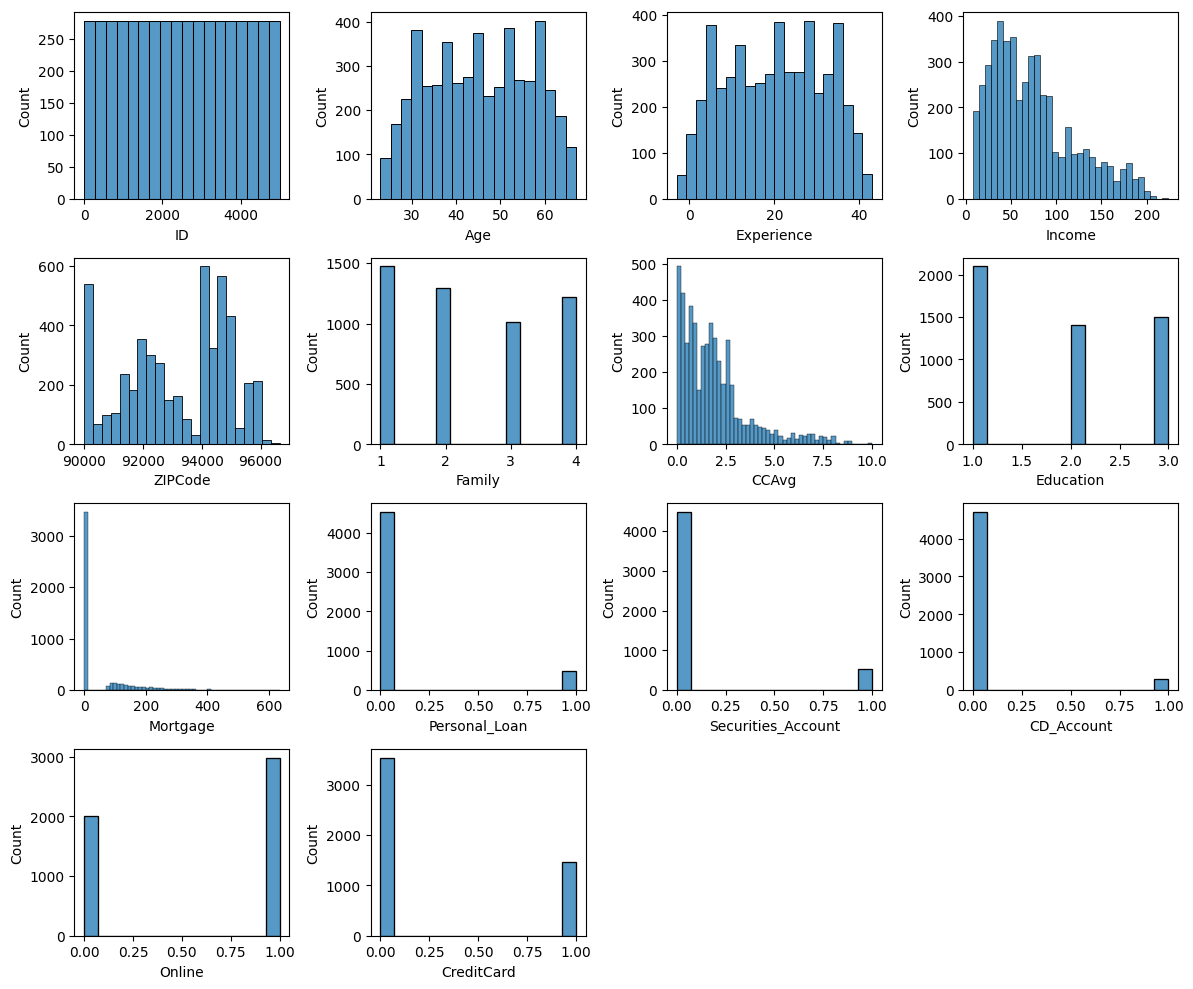

In [ ]:
#Univariate analysis
plt.figure(figsize=(12,10))

for i, feature in enumerate(data.columns):
  plt.subplot(4, 4,i+1)
  sns.histplot(data=data, x=feature)

plt.tight_layout();


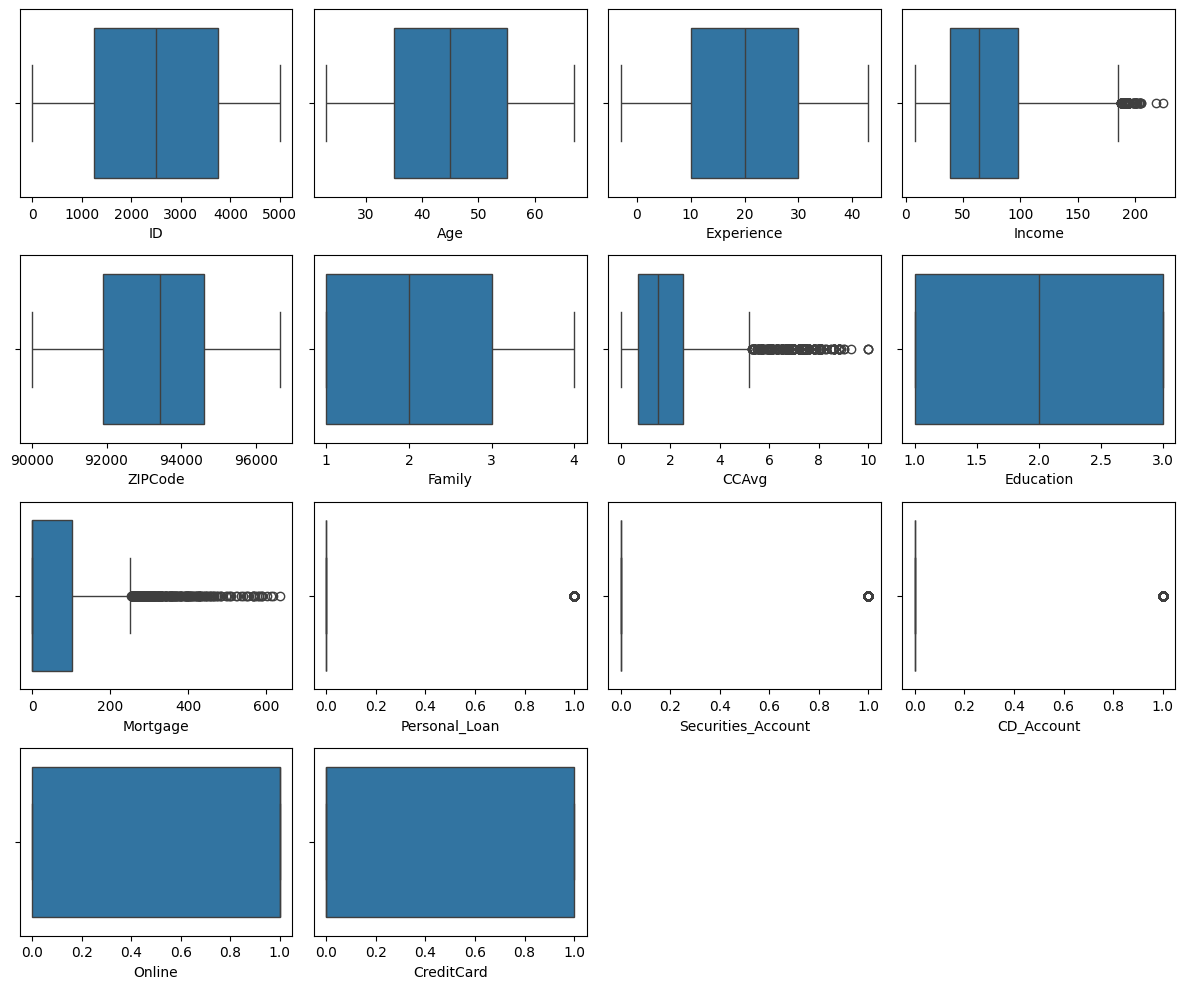

In [ ]:
plt.figure(figsize=(12,10))

for i, feature in enumerate(data.columns):
  plt.subplot(4, 4,i+1)
  sns.boxplot(data=data, x=feature)

plt.tight_layout();

there are simalrity when it comes to personal loan, securities account and cd account with this bank. Majority of customers answered No to these columns but we see a few outliers. Also majority of customers have no mortgage except a few outliers. the median CCAvg is close to 2k per month however there are some customers who said they spend more. this is not clear if the credit card offered by this bank or other banks. Id suggest investigating why those customers are using credit cards but not other services from the bank. it could lead to lack of advertisment or knowlage from the bank to the customers.

In [ ]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

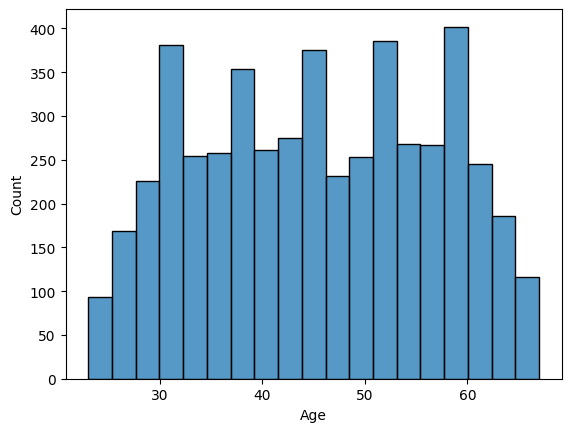

In [ ]:
sns.histplot(data.Age);

age of customers range from about 23 to 65.

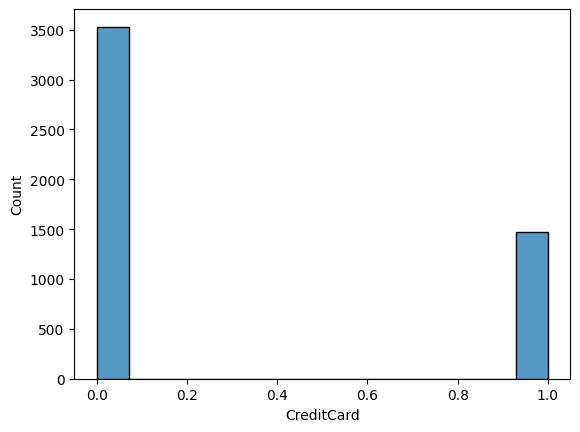

In [ ]:
sns.histplot(data.CreditCard);

majority of customers answered no for the question of Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

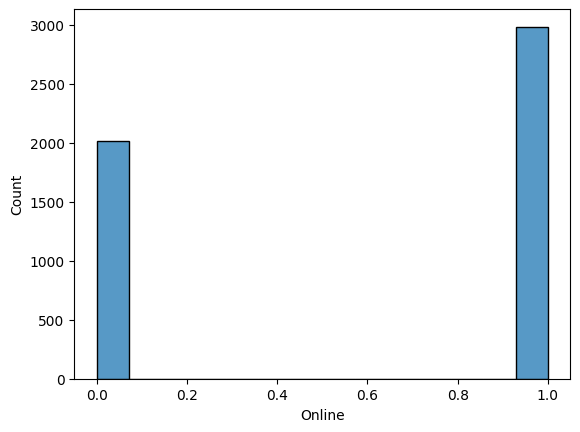

In [ ]:
sns.histplot(data.Online);

majority of customers use online banking.

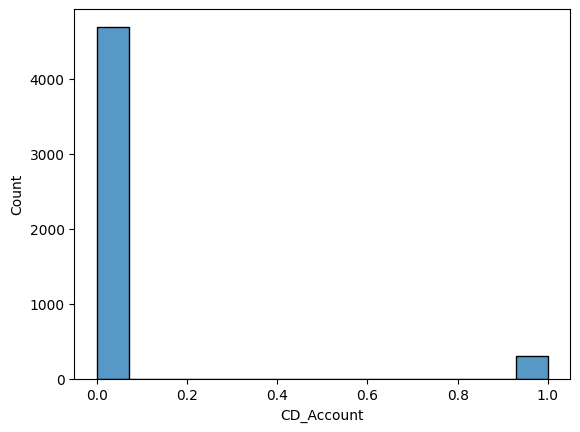

In [ ]:
sns.histplot(data.CD_Account);

majority of customers said no for having a CD account.

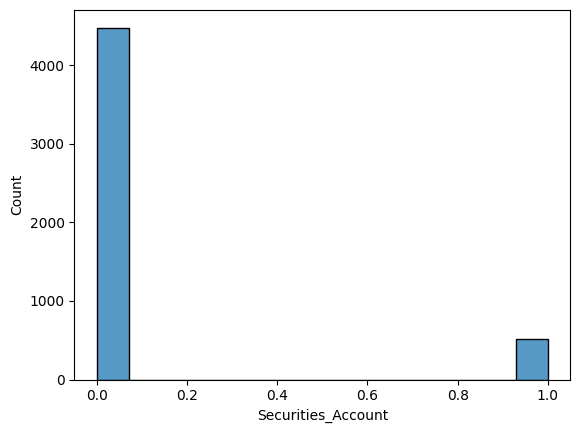

In [ ]:
sns.histplot(data.Securities_Account);

majority of customers answered no for having a securities account.

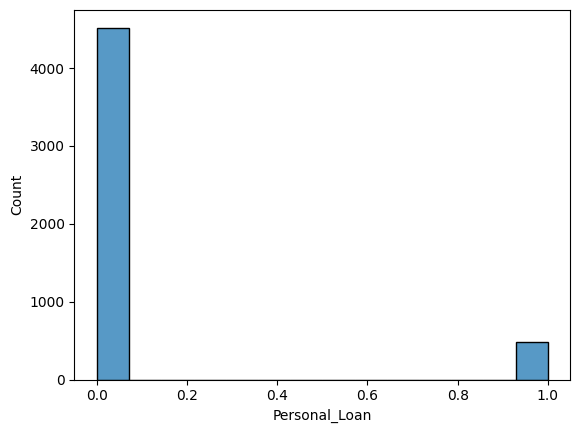

In [ ]:
sns.histplot(data.Personal_Loan);

a very small percentage answered yes for having a personal loan with the bank.

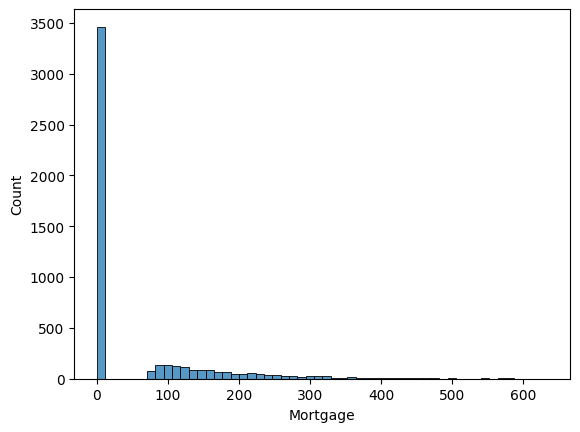

In [ ]:
sns.histplot(data.Mortgage);

there is a spike for the value 0 here, that could be due to not having a mortgage.

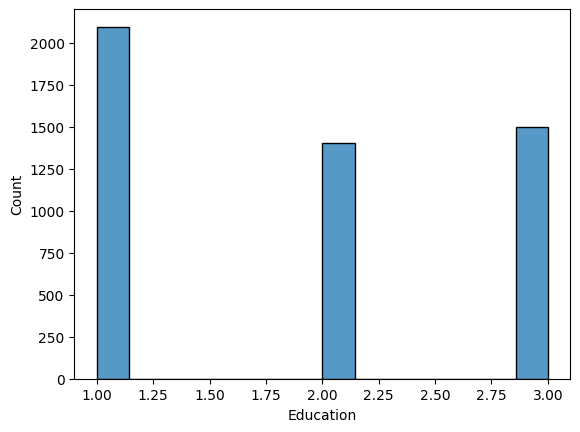

In [ ]:
sns.histplot(data.Education);

a higher percentage of customers have an undergrand education. for graduate and post graduate, they look almost identical percentage.

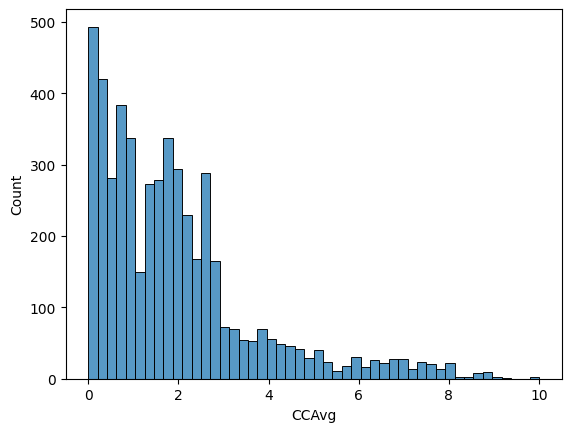

In [ ]:
sns.histplot(data.CCAvg);

right-skewed distribution here.

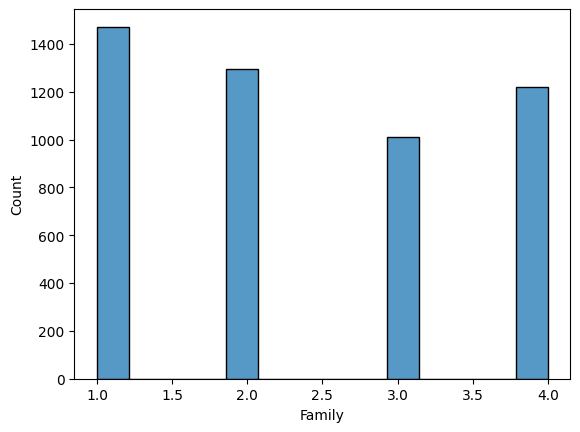

In [ ]:
sns.histplot(data.Family);

the family size of customers are higher at 1 then followed by 2.

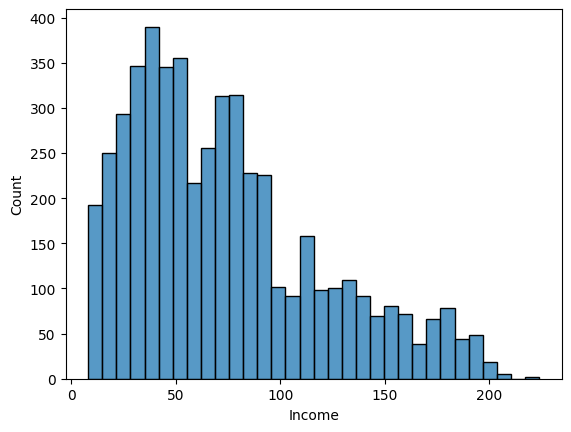

In [ ]:
sns.histplot(data.Income);

right-skewed distirbution

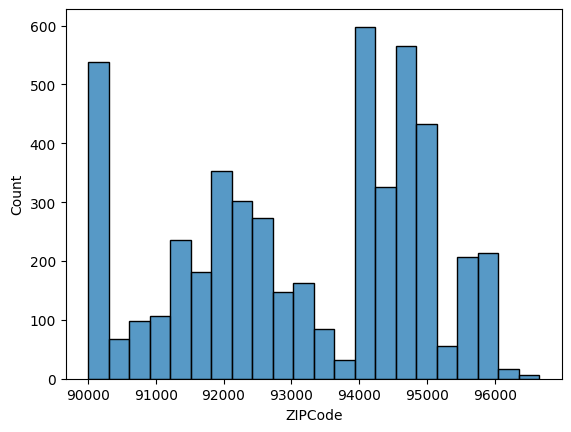

In [ ]:
sns.histplot(data.ZIPCode);

customers of this bank live in diffrent zipcodes.

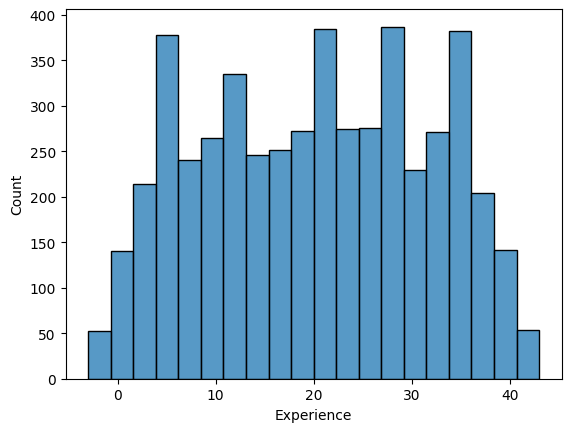

In [ ]:
sns.histplot(data.Experience);

experience ranges from non to 40+ yrs.

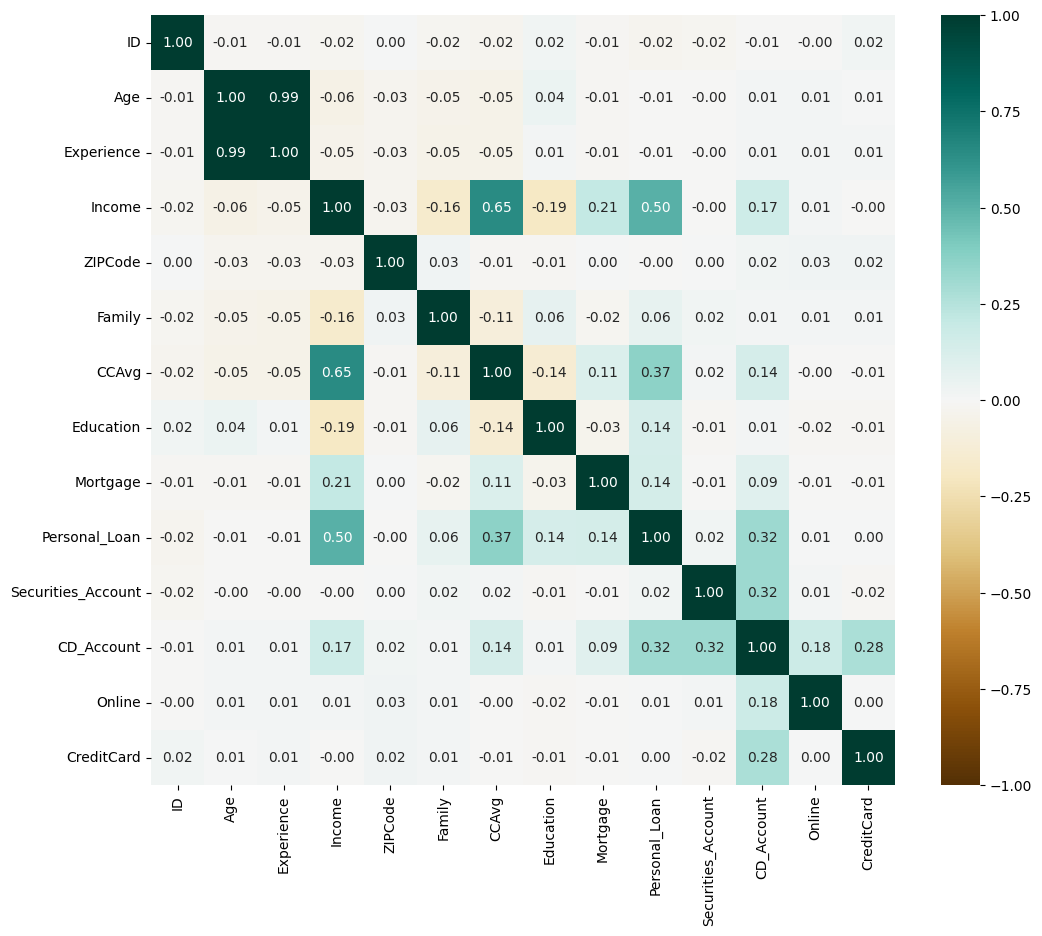

In [ ]:
#Bivariate analysis
plt.figure(figsize=(12,10))

sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG', fmt='.2f');

* there is high positive correlation between age and experiance as well as income and CCAvg. Which means customers with higher income tend to spend more on credit cards.
* the corolation between income and mortage is low positive ( 0.21 ) meanwhile the corelation between income and personal loan is higher positive (0.50) indicating the customers with higher income tend to get a personal loan than a mortgage.

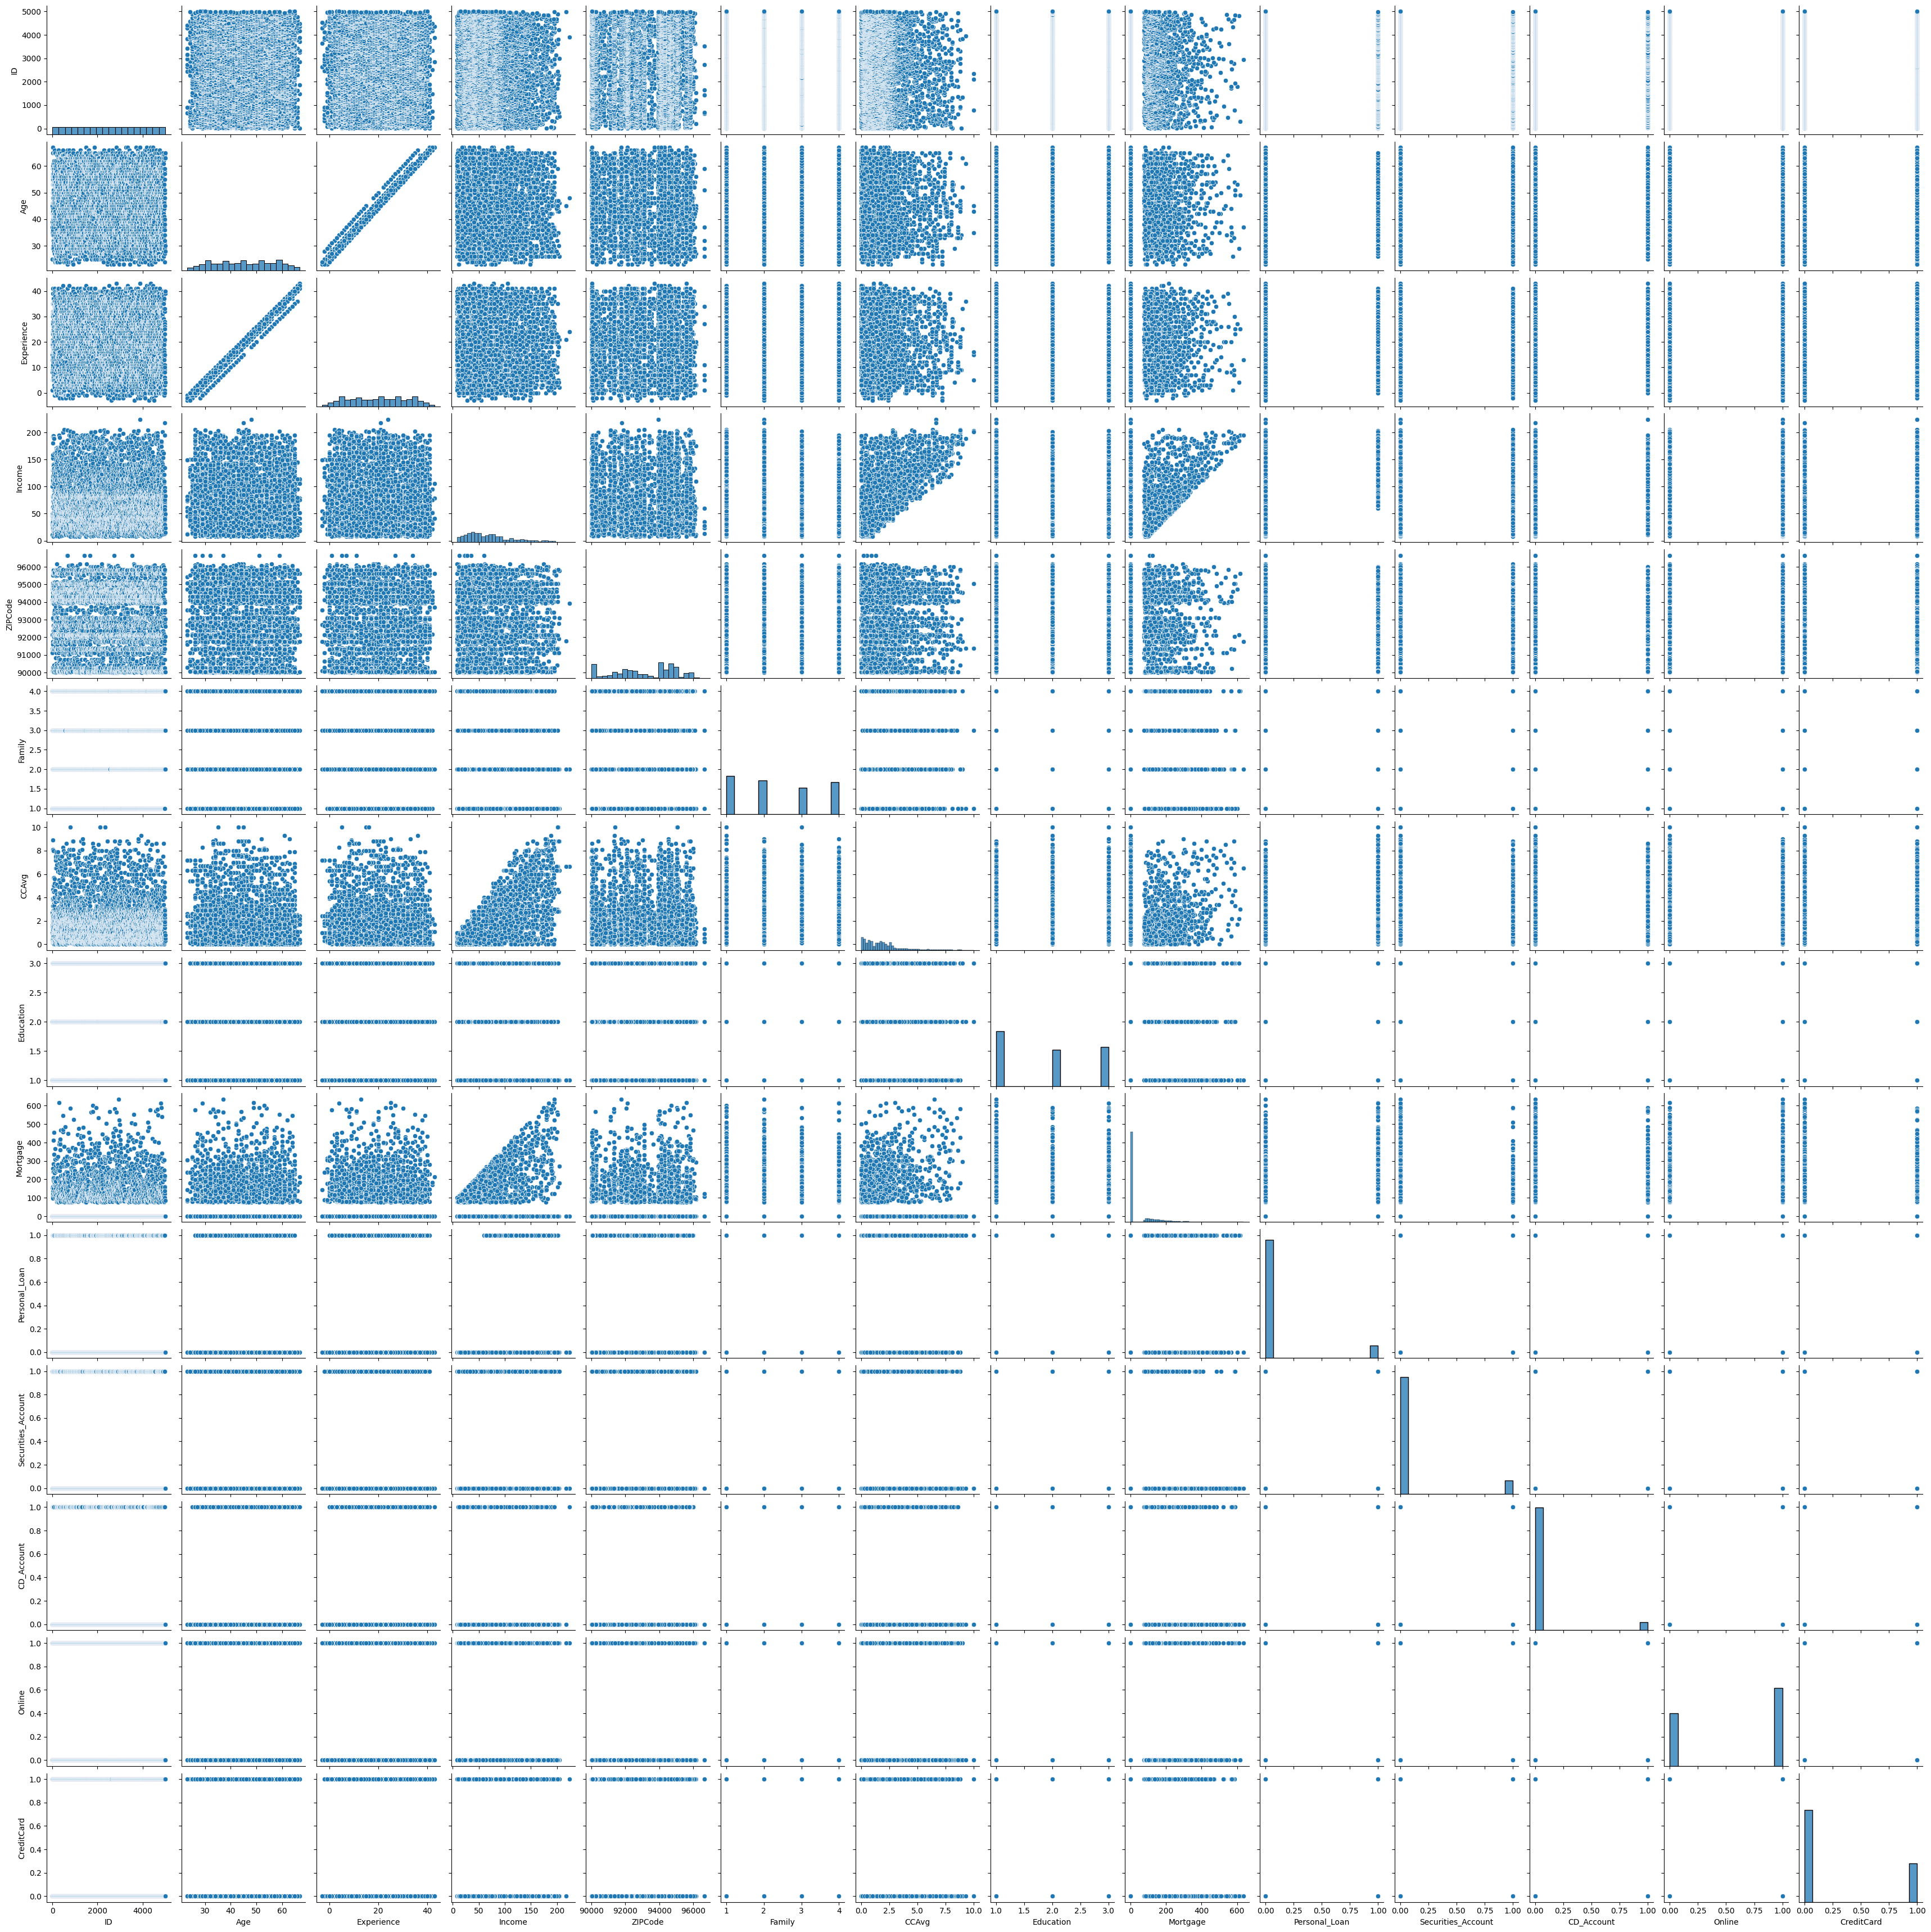

In [ ]:
sns.pairplot(data);

this result of the pair plots helps with clustring the data.

In [ ]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

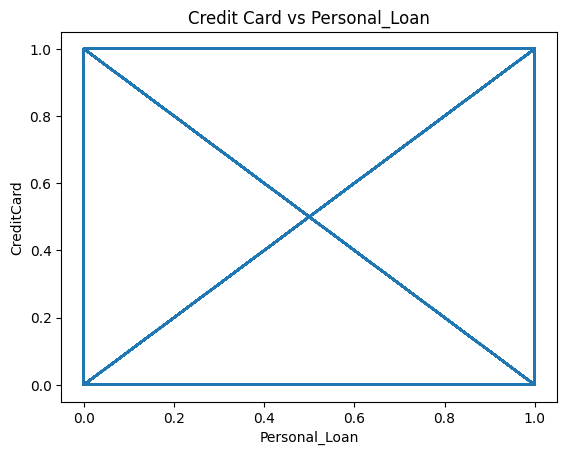

In [ ]:
plt.plot(data["Personal_Loan"], data["CreditCard"])
plt.xlabel("Personal_Loan")
plt.ylabel("CreditCard")
plt.title("Credit Card vs Personal_Loan");

this graph confirms no correlation between credit card and personal loan.

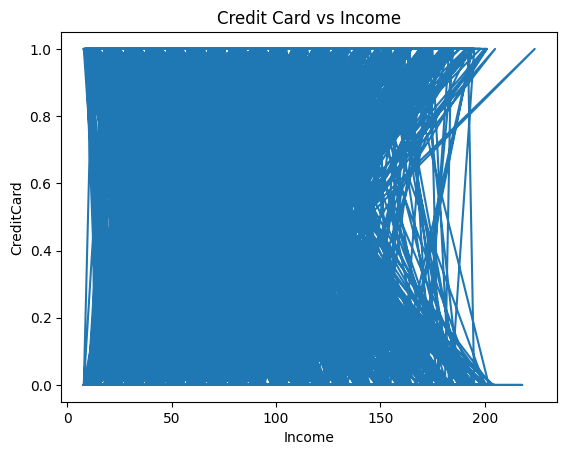

In [ ]:
plt.plot(data["Income"], data["CreditCard"])
plt.xlabel("Income")
plt.ylabel("CreditCard")
plt.title("Credit Card vs Income");

There appears to be a general positive trend between CreditCard and Income. As Income increases, CreditCard usage or balance also tends to increase. However, this relationship is not perfectly linear.

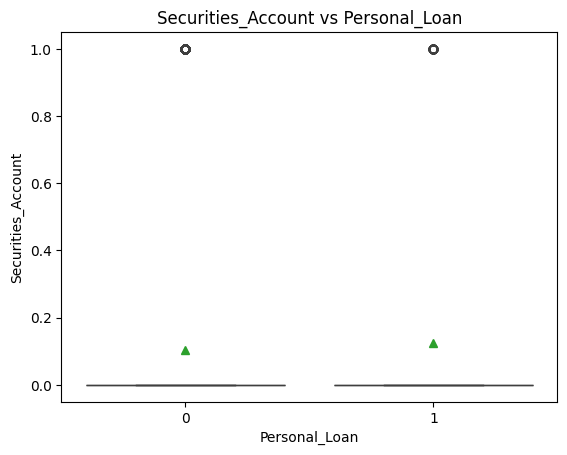

In [ ]:
sns.boxplot(
    x = "Personal_Loan",
    y = "Securities_Account",
    showmeans=True,
    data=data
)
plt.title("Securities_Account vs Personal_Loan")
plt.show()

this graph confirms there is no correlation between securities and personal loan.

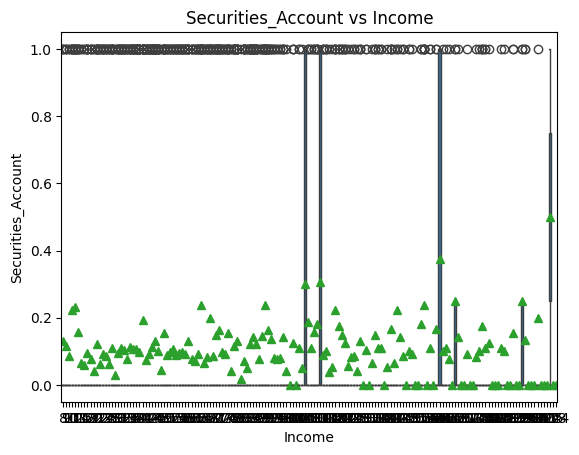

In [ ]:
sns.boxplot(
    x = "Income",
    y = "Securities_Account",
    showmeans=True,
    data=data
)
plt.title("Securities_Account vs Income")
plt.show()

the plot suggests a positive relationship between Securities_Account and Income, but there is also significant variability and the presence of outliers. This suggests that other factors besides income likely influence securities account values.

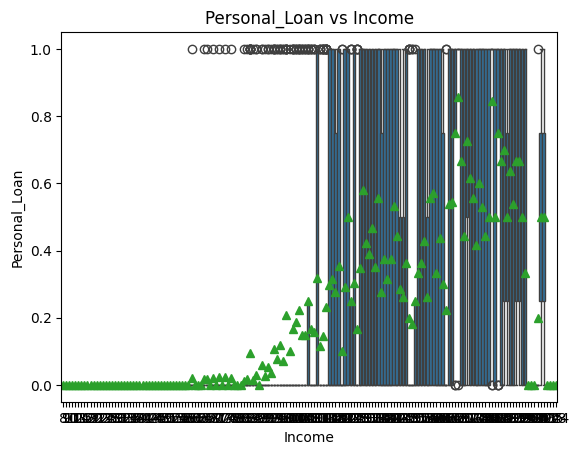

In [ ]:
sns.boxplot(
    x = "Income",
    y = "Personal_Loan",
    showmeans=True,
    data=data
)
plt.title("Personal_Loan vs Income")
plt.show()

the plot suggests a positive relationship between Personal_Loan and Income, but there is also significant variability and the presence of outliers. This suggests that other factors besides income likely influence personal loan applications or approvals.

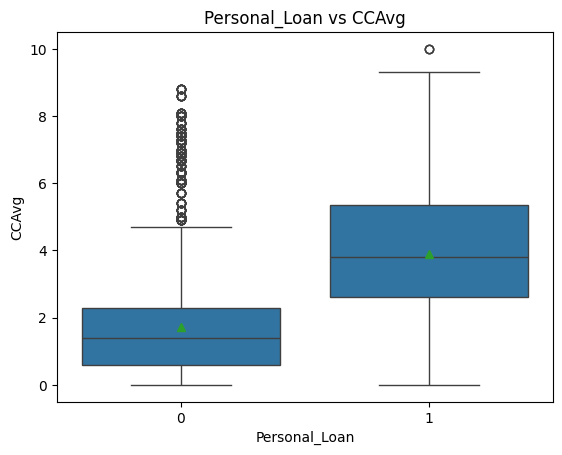

In [ ]:
sns.boxplot(
    x = "Personal_Loan",
    y = "CCAvg",
    showmeans=True,
    data=data
)
plt.title("Personal_Loan vs CCAvg")
plt.show()

customers who uses CCAvg they also tend to have a personal loan.

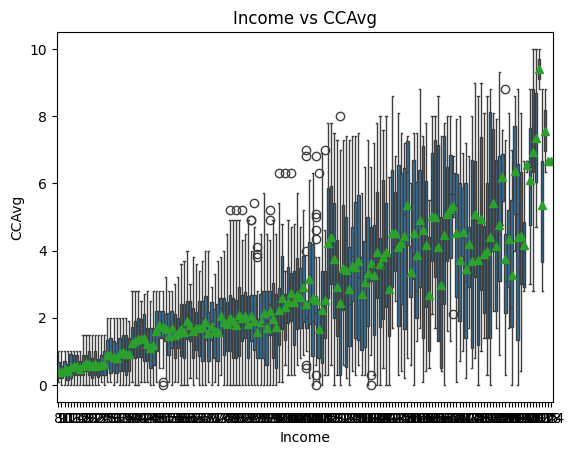

In [ ]:
sns.boxplot(
    x = "Income",
    y = "CCAvg",
    showmeans=True,
    data=data
)
plt.title("Income vs CCAvg")
plt.show()

this shows an increasing trend in CCAvg as Income increases. This suggests that individuals with higher income tend to have higher average credit card spending.

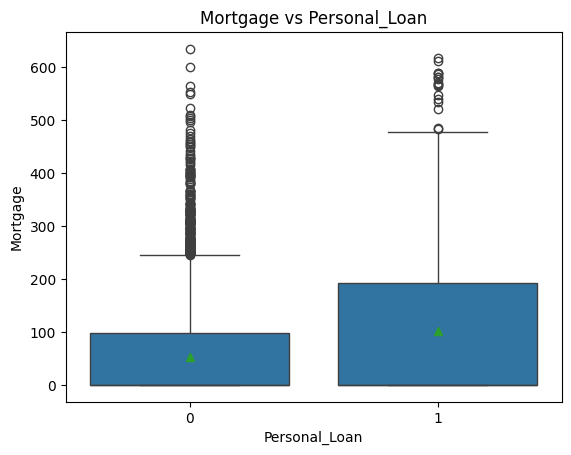

In [ ]:
sns.boxplot(
    x = "Personal_Loan",
    y = "Mortgage",
    showmeans=True,
    data=data
)
plt.title("Mortgage vs Personal_Loan")
plt.show()

customers who answered yes to personal loan they tend to have a higher mortgage.

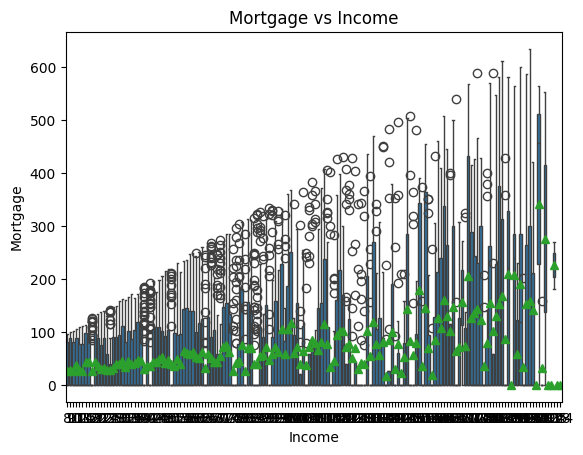

In [ ]:
sns.boxplot(
    x = "Income",
    y = "Mortgage",
    showmeans=True,
    data=data
)
plt.title("Mortgage vs Income")
plt.show()

show an increasing trend in Mortgage as Income increases. This suggests that individuals with higher income tend to have higher mortgage amounts.

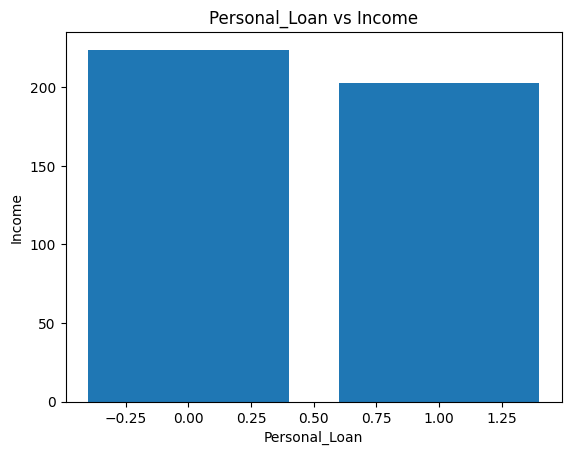

In [ ]:
plt.bar(data["Personal_Loan"], data["Income"])
plt.xlabel("Personal_Loan")
plt.ylabel("Income")
plt.title("Personal_Loan vs Income")
plt.show();

 Income might not be the only factor influencing personal loan decisions. Other factors like credit score, debt-to-income ratio, or financial needs could also play a role.

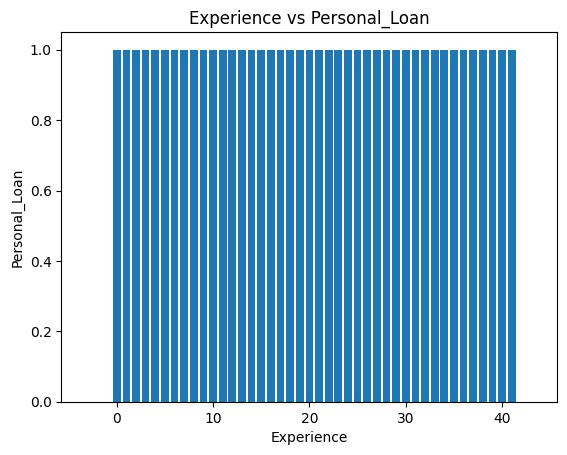

In [ ]:
plt.bar(data["Experience"], data["Personal_Loan"])
plt.xlabel("Experience")
plt.ylabel("Personal_Loan")
plt.title("Experience vs Personal_Loan")
plt.show();

this graph confrims there is no relationship between experience and personal loan.

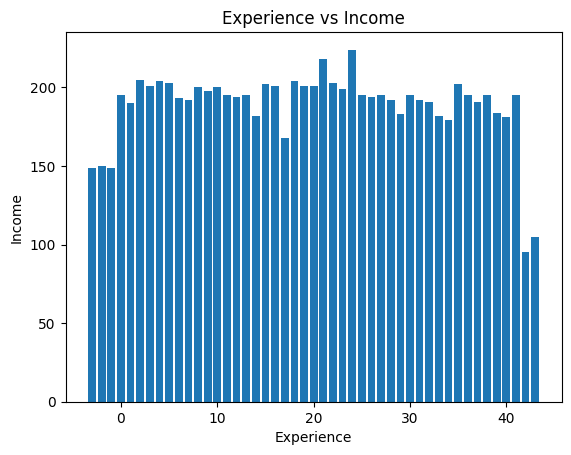

In [ ]:
plt.bar(data["Experience"], data["Income"])
plt.xlabel("Experience")
plt.ylabel("Income")
plt.title("Experience vs Income")
plt.show();

there is not a significant correlation between experience and income.

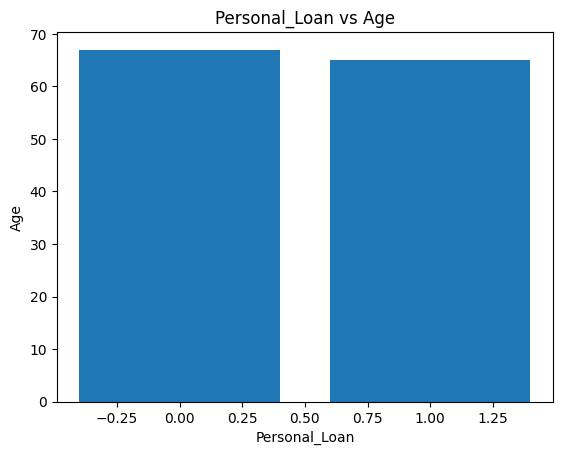

In [ ]:
plt.bar(data["Personal_Loan"], data["Age"])
plt.xlabel("Personal_Loan")
plt.ylabel("Age")
plt.title("Personal_Loan vs Age")
plt.show();

this graph confirms there is no correlation between age and personal loan.

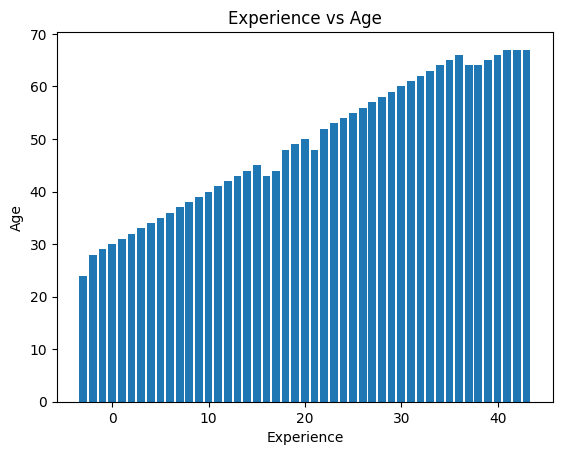

In [ ]:
plt.bar(data["Experience"], data["Age"])
plt.xlabel("Experience")
plt.ylabel("Age")
plt.title("Experience vs Age")
plt.show();

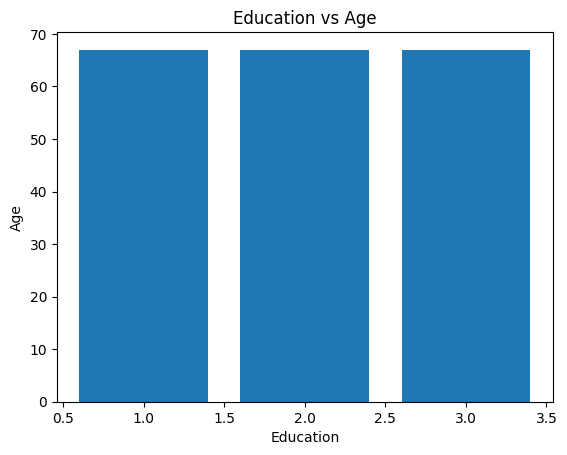

In [ ]:
plt.bar(data["Education"], data["Age"])
plt.xlabel("Education")
plt.ylabel("Age")
plt.title("Education vs Age")
plt.show();

Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

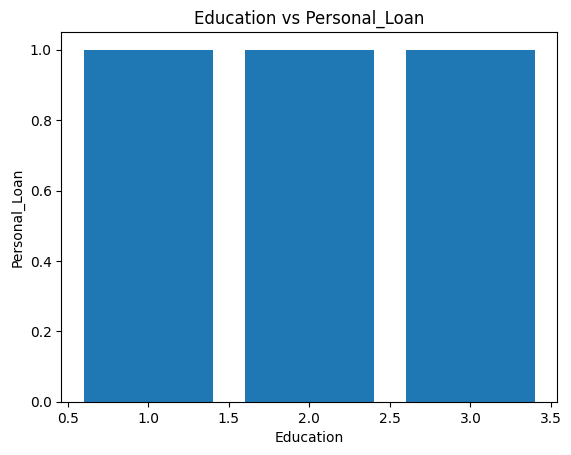

In [ ]:
plt.bar(data["Education"], data["Personal_Loan"])
plt.xlabel("Education")
plt.ylabel("Personal_Loan")
plt.title("Education vs Personal_Loan")
plt.show();

## Data Preprocessing

In [ ]:
#dropping zipcode columns
data.drop("ZIPCode", axis=1, inplace=True)

###scaling

In [ ]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data))
scaled_data.head()

0         1         2         3         4         5         6   \
0 -1.731704 -1.774417 -1.666078 -0.538229  1.397414 -0.193385 -1.049078   
1 -1.731012 -0.029524 -0.096330 -0.864109  0.525991 -0.250611 -1.049078   
2 -1.730319 -0.552992 -0.445163 -1.363793 -1.216855 -0.536736 -1.049078   
3 -1.729626 -0.901970 -0.968413  0.569765 -1.216855  0.436091  0.141703   
4 -1.728933 -0.901970 -1.055621 -0.625130  1.397414 -0.536736  0.141703   

         7         8         9        10        11        12        13  
0 -0.555524 -0.325875  2.928915 -0.25354 -1.216618 -0.645314  0.045772  
1 -0.555524 -0.325875  2.928915 -0.25354 -1.216618 -0.645314  0.045772  
2 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618 -0.645314  0.045772  
3 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618 -0.645314  0.045772  
4 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618  1.549632  0.045772

this shows the variables and if they have a standard deviation above average (positive) which indicates more spreadout points or below average (negative) which indicates points clustered closer to the mean, meanwhile 1 means 1 unit of standard deviation.

In [ ]:
scaled_data.describe()

0             1             2             3             4   \
count  5000.000000  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean      0.000000 -2.131628e-18 -1.179501e-16  1.449507e-16  1.001865e-16   
std       1.000100  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min      -1.731704 -1.948906e+00 -2.014911e+00 -1.428969e+00 -1.216855e+00   
25%      -0.865852 -9.019702e-01 -8.812043e-01 -7.554825e-01 -1.216855e+00   
50%       0.000000 -2.952359e-02 -9.121982e-03 -2.123482e-01 -3.454321e-01   
75%       0.865852  8.429230e-01  8.629604e-01  5.263146e-01  5.259909e-01   
max       1.731704  1.889859e+00  1.996667e+00  3.263712e+00  1.397414e+00   

                 5             6             7             8             9   \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean  -6.394885e-17  2.557954e-17 -5.613288e-17 -4.973799e-17 -2.273737e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -1.108987e+00 -1.049078e+00 -5.555239e-01 -3.258753e-01 -3.414233e-01   
25%   -7.084116e-01 -1.049078e+00 -5.555239e-01 -3.258753e-01 -3.414233e-01   
50%   -2.506106e-01  1.417029e-01 -5.555239e-01 -3.258753e-01 -3.414233e-01   
75%    3.216407e-01  1.332484e+00  4.375576e-01 -3.258753e-01 -3.414233e-01   
max    4.613525e+00  1.332484e+00  5.688108e+00  3.068659e+00  2.928915e+00   

                 10            11            12            13  
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  
mean   2.131628e-17  4.121148e-17  7.105427e-18  6.750156e-17  
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  
min   -2.535403e-01 -1.216618e+00 -6.453143e-01 -9.239726e-01  
25%   -2.535403e-01 -1.216618e+00 -6.453143e-01 -9.239726e-01  
50%   -2.535403e-01  8.219509e-01 -6.453143e-01  4.577194e-02  
75%   -2.535403e-01  8.219509e-01  1.549632e+00  4.577194e-02  
max    3.944146e+00  8.219509e-01  1.549632e+00  1.985261e+00

all the attributes have a mean about 0 and std about 1 after scaling.

###checking for outliers

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


numerical_data = data.select_dtypes(include=["float64", "int64"])

mask = numerical_data.apply(lambda x: (x < lower[x.name]) | (x > upper[x.name]), axis=0)

outlier_percentage = (mask.sum() / len(data)) * 100
print(outlier_percentage)

ID                     0.00
Age                    0.00
Experience             0.00
Income                 1.92
Family                 0.00
CCAvg                  6.48
Education              0.00
Mortgage               5.82
Personal_Loan          9.60
Securities_Account    10.44
CD_Account             6.04
Online                 0.00
CreditCard             0.00
dtype: float64


###checking for missing items

In [ ]:
missing_columns = data.columns[data.isnull().any()]
for column in missing_columns:
    print(f"\nColumn: {column}")
    print(data[column].describe())

correlation_matrix = data.corr()
print(correlation_matrix)

                          ID       Age  Experience    Income    Family  \
ID                  1.000000 -0.008473   -0.008326 -0.017695 -0.016797   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.046418   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.052563   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.157501   
Family             -0.016797 -0.046418   -0.052563 -0.157501  1.000000   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.109275   
Education           0.021463  0.041334    0.013152 -0.187524  0.064929   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806 -0.020445   
Personal_Loan      -0.024801 -0.007726   -0.007413  0.502462  0.061367   
Securities_Account -0.016972 -0.000436   -0.001232 -0.002616  0.019994   
CD_Account         -0.006909  0.008043    0.010353  0.169738  0.014110   
Online             -0.002528  0.013702    0.013898  0.014206  0.010354   
CreditCard          0.017028  0.007681

Strong Correlations: Values close to 1 or -1 indicate strong positive or negative correlations, respectively. For example, the correlation between Age and Experience is 0.994215, suggesting a very strong positive correlation, which makes sense as older individuals generally have more experience.
Weak Correlations: Values close to 0 indicate weak or no correlation. For example, the correlation between Income and ZIPCode is -0.030709, suggesting a very weak negative correlation.

###spliting data

In [ ]:
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["Securities_Account", "Education"], drop_first=True)
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500,), (1500,))

### using TSNE to help visualize high demisntional clustring by projecting into 2D and 3D space.

In [ ]:
TSNE_model = TSNE(n_components=2, n_jobs=-2, random_state=RS)
TSNE_data = TSNE_model.fit_transform(scaled_data)

In [ ]:
tsne_2d = pd.DataFrame(TSNE_data, columns=["Feature1", "Feature2"])
tsne_2d.head()

Feature1   Feature2
0  26.120329  20.549318
1  32.853241  20.431444
2   0.310386 -40.544971
3  13.739268 -59.460190
4  11.257504  17.543612

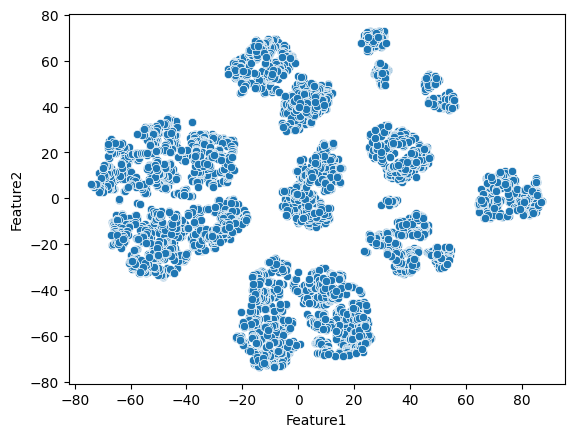

In [ ]:
sns.scatterplot(x="Feature1", y="Feature2", data=tsne_2d);

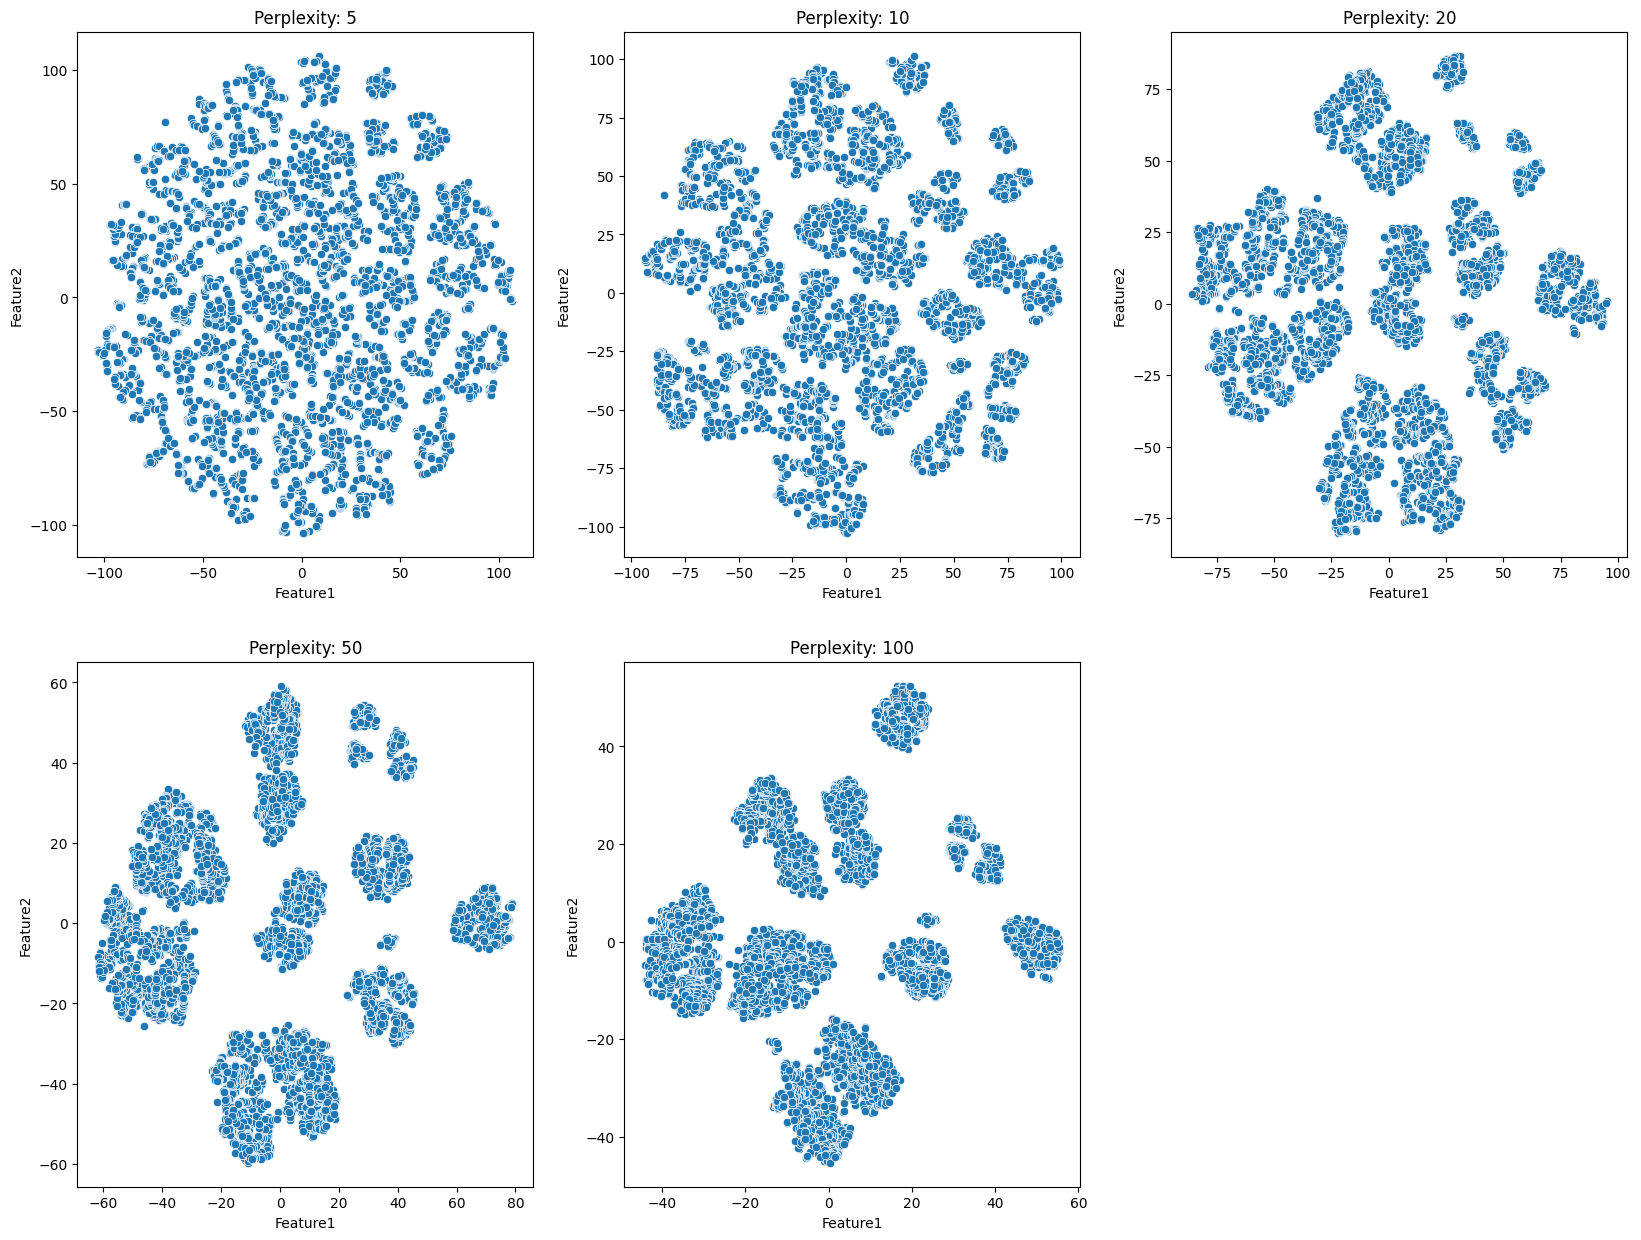

In [ ]:
perplexity = [5, 10, 20, 50, 100]
plt.figure(figsize=(20, 15))

for i in range(len(perplexity)):
  tsne_model = TSNE(n_components=2, perplexity=perplexity[i], n_jobs=-2, random_state=RS)
  X_red = tsne_model.fit_transform(scaled_data)
  red_data_df= pd.DataFrame(X_red, columns=["Feature1", "Feature2"])
  plt.subplot(2, 3, i+1)
  sns.scatterplot(x="Feature1", y="Feature2", data=red_data_df)
  plt.title(f"Perplexity: {perplexity[i]}")
plt.show()

we can see roughly 8 clusters. best preplexity is 50.

In [ ]:
tsne = TSNE(n_components=3,perplexity=50, n_jobs=-2, random_state=RS)
tsne_reduced_data = tsne.fit_transform(scaled_data)
tsne_3d = pd.DataFrame(tsne_reduced_data, columns=["Feature1", "Feature2", "Feature3"])
tsne_3d.head()

Feature1  Feature2   Feature3
0  13.990493 -3.748916   9.964691
1  13.546875 -8.418332   7.004653
2  -2.301527 -4.572297 -17.021061
3  -0.630570 -3.378242 -18.945374
4   2.939779 -3.407371   3.188262

In [ ]:
fig = px.scatter_3d(tsne_3d,x="Feature1", y="Feature2", z= "Feature3")
fig.show()

the data shows a good visual seperation and roughly 6 clusters.

###KMeans clustring
* model building with K=4

In [ ]:
n_clusters = 4
kmeans_4 = KMeans(n_clusters=n_clusters, random_state=RS)
kmeans_4.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

now we have a K-Means model with instance of k=4.

In [ ]:
wscc_k4 = kmeans_4.inertia_
wscc_k4

48522.61009690972

The WCSS is a measure of how well the data points are grouped within their assigned clusters. A lower WCSS indicates that the data points within each cluster are closer to their cluster center on average, suggesting a potentially better clustering.

The printed value (50713.92290665741) represents the specific WCSS for the K-Means model with 4 clusters.

In [ ]:
sil_score_k4 = silhouette_score(scaled_data, kmeans_4.labels_)
sil_score_k4

0.13546835076046024

its ok score for k=4. best score is 1 in clustring but this is for k=4.

In [ ]:
tsne_2d["Cluster"] = kmeans_4.labels_
tsne_2d.head(10)

Feature1   Feature2  Cluster
0  26.120329  20.549318        3
1  32.853241  20.431444        3
2   0.310386 -40.544971        3
3  13.739268 -59.460190        3
4  11.257504  17.543612        1
5 -41.748386 -16.273495        3
6 -44.643139  10.975156        0
7  -0.304183   5.638047        0
8 -41.101147 -15.220817        3
9  77.724144   3.920527        2

the cluster column shows (0,1,2,3) which are the labels for clusters.

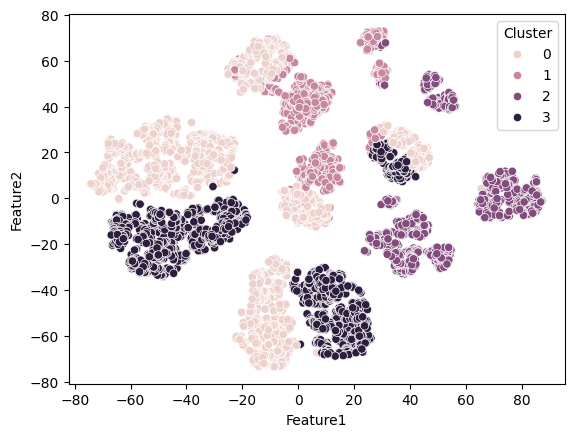

In [ ]:
sns.scatterplot(tsne_2d, x="Feature1", y="Feature2", hue="Cluster");

to show how far points from each other in cluster. and how far clusters from each other.

In [ ]:
tsne_3d["Cluster"] = kmeans_4.labels_
tsne_3d.head(10)

Feature1   Feature2   Feature3  Cluster
0  13.990493  -3.748916   9.964691        3
1  13.546875  -8.418332   7.004653        3
2  -2.301527  -4.572297 -17.021061        3
3  -0.630570  -3.378242 -18.945374        3
4   2.939779  -3.407371   3.188262        1
5  -6.075898  16.159910  -0.511518        3
6 -15.856679  -1.705868   2.295858        0
7   1.517819 -10.734694   9.185658        0
8  -5.034415  16.514866  -0.436886        3
9  18.452112   7.632922  -2.962474        2

In [ ]:
fig = px.scatter_3d(tsne_3d,x="Feature1", y="Feature2", z= "Feature3", color="Cluster")
fig.show()

####finding optimal k

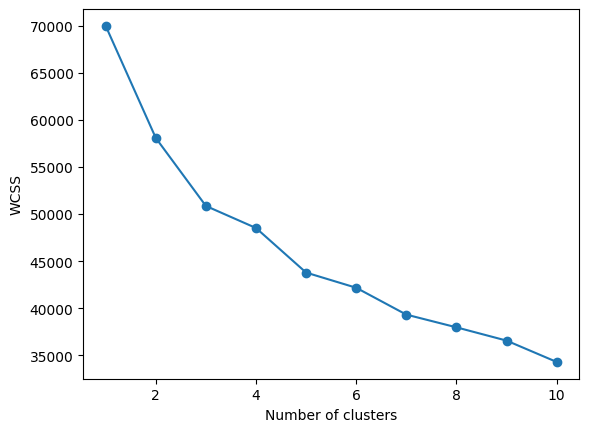

In [ ]:
wscc_list = []
for i in range(1, 11):
  clusterer = KMeans(n_clusters=i, random_state=RS)
  clusterer.fit(scaled_data)
  wscc_list.append(clusterer.inertia_)
plt.plot(range(1, 11), wscc_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

the elbow point appears to be around 3 or 4 clusters.

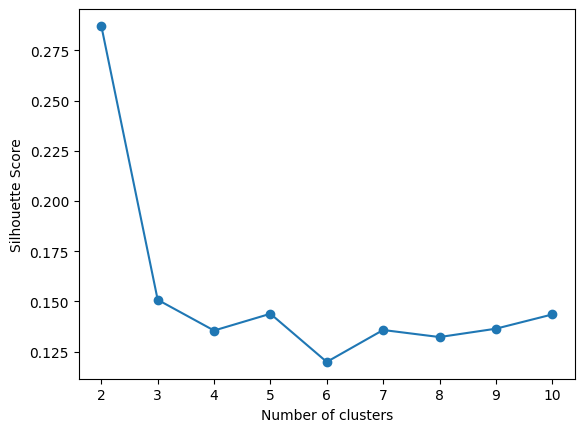

In [ ]:
sil_score = []
for i in range(2, 11):
  clusterer = KMeans(n_clusters=i, random_state=RS)
  clusterer.fit(scaled_data)
  score = silhouette_score(scaled_data, clusterer.labels_)
  sil_score.append(score)
plt.plot(range(2, 11), sil_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

k=4 is the optimal k.

###Cluster Profiling

In [ ]:
data["Cluster"] = kmeans_4.labels_
data.head(10)

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       4    1.6          1         0   
1   2   45          19      34       3    1.5          1         0   
2   3   39          15      11       1    1.0          1         0   
3   4   35           9     100       1    2.7          2         0   
4   5   35           8      45       4    1.0          2         0   
5   6   37          13      29       4    0.4          2       155   
6   7   53          27      72       2    1.5          2         0   
7   8   50          24      22       1    0.3          3         0   
8   9   35          10      81       3    0.6          2       104   
9  10   34           9     180       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  Cluster  
0              0                   1           0       0           0        3  
1              0                   1           0       0           0        3  
2              0                   0           0       0           0        3  
3              0                   0           0       0           0        3  
4              0                   0           0       0           1        1  
5              0                   0           0       1           0        3  
6              0                   0           0       1           0        0  
7              0                   0           0       0           1        0  
8              0                   0           0       1           0        3  
9              1                   0           0       0           0        2

Cluster
0    39.38
3    28.20
2    18.08
1    14.34
Name: proportion, dtype: float64 



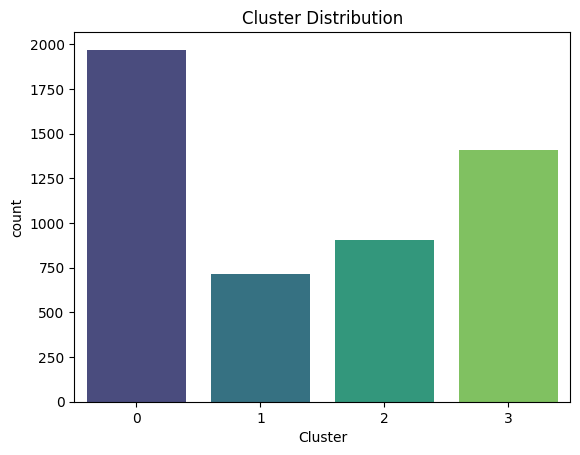

In [ ]:
print(100*data.Cluster.value_counts(normalize=True),"\n")
sns.countplot(data=data, x="Cluster", palette = 'viridis').set_title("Cluster Distribution");

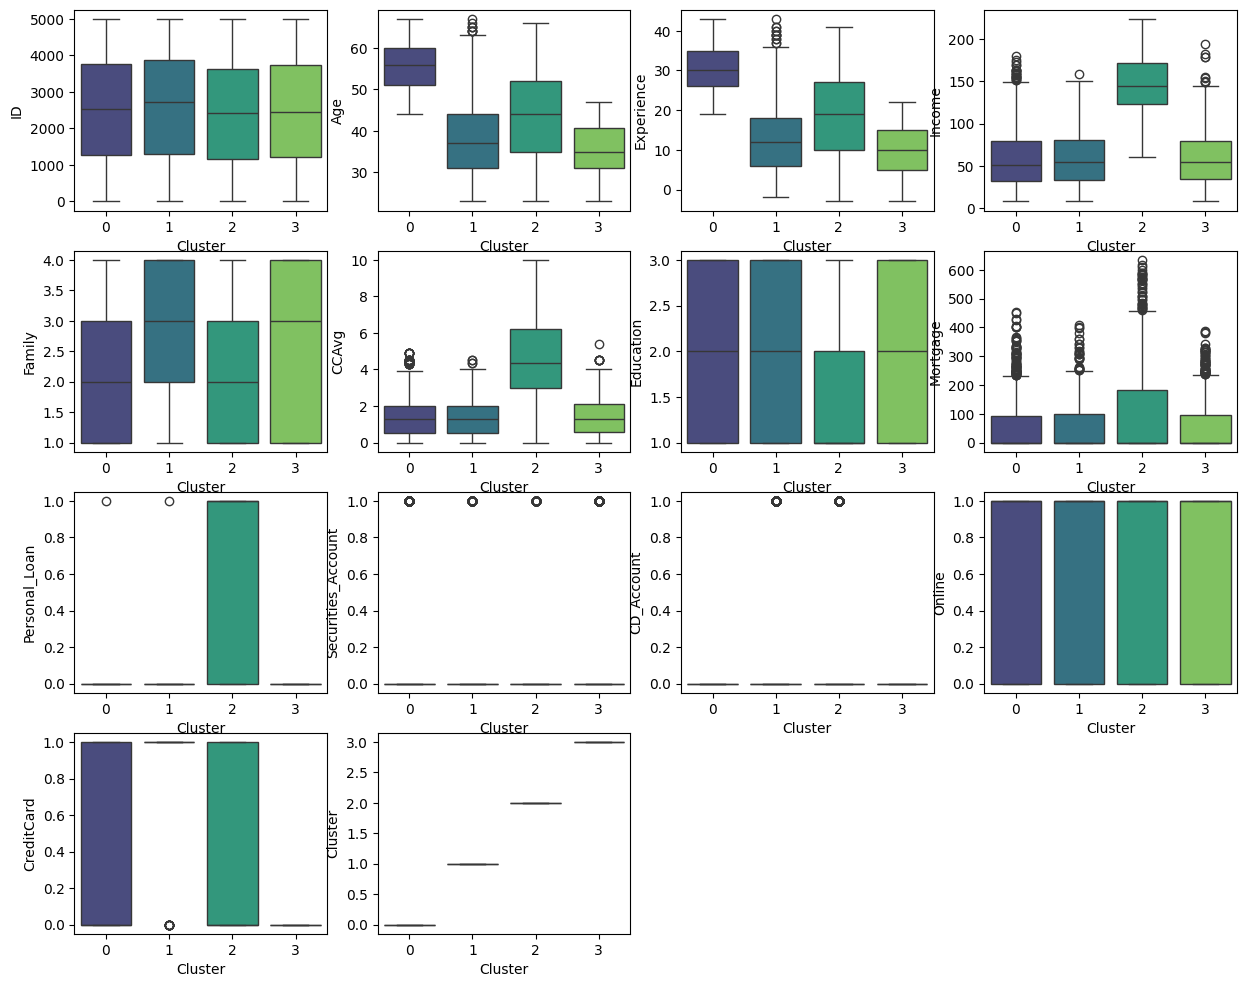

In [ ]:
plt.figure(figsize=(15,12))

for i, variable in enumerate(data.columns):
  plt.subplot(4, 4,i+1)
  sns.boxplot(data=data, x="Cluster", y=variable, palette = 'viridis');

based on these plots we can see cluster 2,and 3 respond to customers with a personal loan. the same clusters respond to higher income customers. similarly with CCAvg.
*cluster 0:
*they are older customers with avg 55yo, and more experiance.
* with no personal loan and low mortgage.
*cluster 1:
* they are between 30-40yo with median income of 50k
* they dont have personal loan and under 100k mortgage.
*cluster 2:
* their age around 43yo and income of 110k
* those customers have a personal loan and a mortgage under 200k.
*they also have securities account.
*cluster 3:
* similar age group to cluster 2, with income of 150k
* they use the CCAvg higher and lower education level.
* they do have personal loan and mortgage under 200k. except a few outliers.

## Model Building

* Decision Tree - Base Model
* Decision Tree - Pre-Pruning
* Decision Tree - Post-Pruning

### Model Evaluation Criterion

### Model Building


####Decision Tree - Base Model

In [ ]:
#decision tree base model defult
tree1 = DecisionTreeClassifier(random_state=RS)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    function to compute diffrent metrics to check model performance classification:
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame({
        'Accuracy': acc,
        'Recall': recall,
        'Precision': precision,
        'F1': f1},
        index=[0]
  )
    return df_perf


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [ ]:
def plot_confusion_matrix(model, predictors, target):
  """
  function to plot confusion matrix
  model: classifier
  predictors: independent variables
  target: dependent variable
  """
  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
          for item in cm.flatten()
      ]
  ).reshape(2, 2)

  sns.heatmap(cm, annot=labels, fmt="")

  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.title("Confusion Matrix")

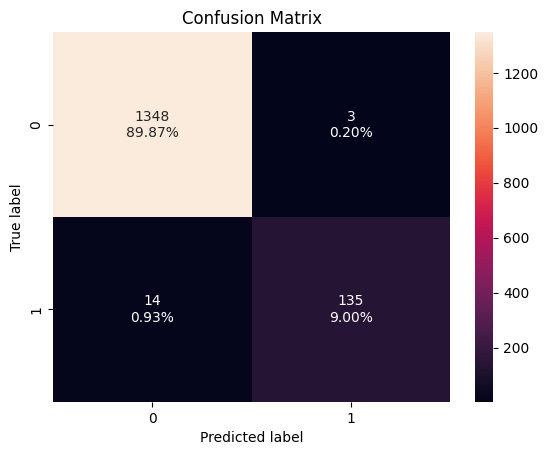

In [ ]:
plot_confusion_matrix(tree1, X_test, y_test)

this shows there is a high accuracy on prediction during training about 99%.   there is very small false neg and false postive during prediction.

In [ ]:
tree1_train_perf = model_performance_classification(tree1, X_train, y_train)
tree1_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

everybody has been predected perfectly during the train set. as accuracy shows 100%

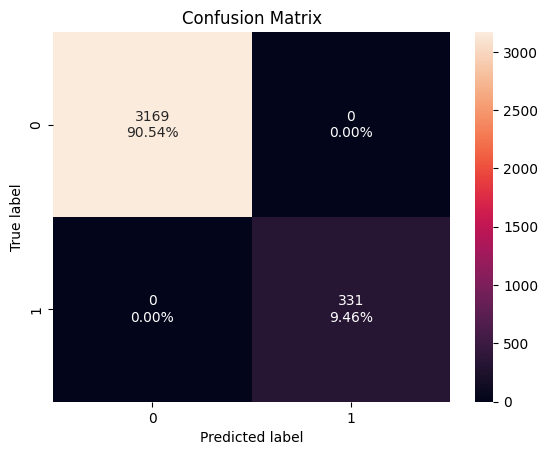

In [ ]:
plot_confusion_matrix(tree1, X_train, y_train)

perefct. Has a high accuracy: 90.54% of the data points were correctly classified.

In [ ]:
tree1_test_perf = model_performance_classification(tree1, X_test, y_test)
tree1_test_perf

Accuracy   Recall  Precision        F1
0  0.988667  0.90604   0.978261  0.940767

this shows that the accuracy is 98% accurate during test.

*Accuracy: 0.982667 (98.27%) - This indicates that 98.27% of the data points were correctly classified by the model.

*Recall: 0.865772 (86.58%) - This indicates that 86.58% of the actual positive cases were correctly identified by the model (true positives).

*Precision: 0.955556 (95.56%) - This indicates that 95.56% of the predicted positive cases were actually positive (true positives).

*F1-score: 0.908451 (90.85%) - This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

*Overall, these metrics suggest that the model is performing well on the test dataset.

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'Cluster'],
      dtype='object')

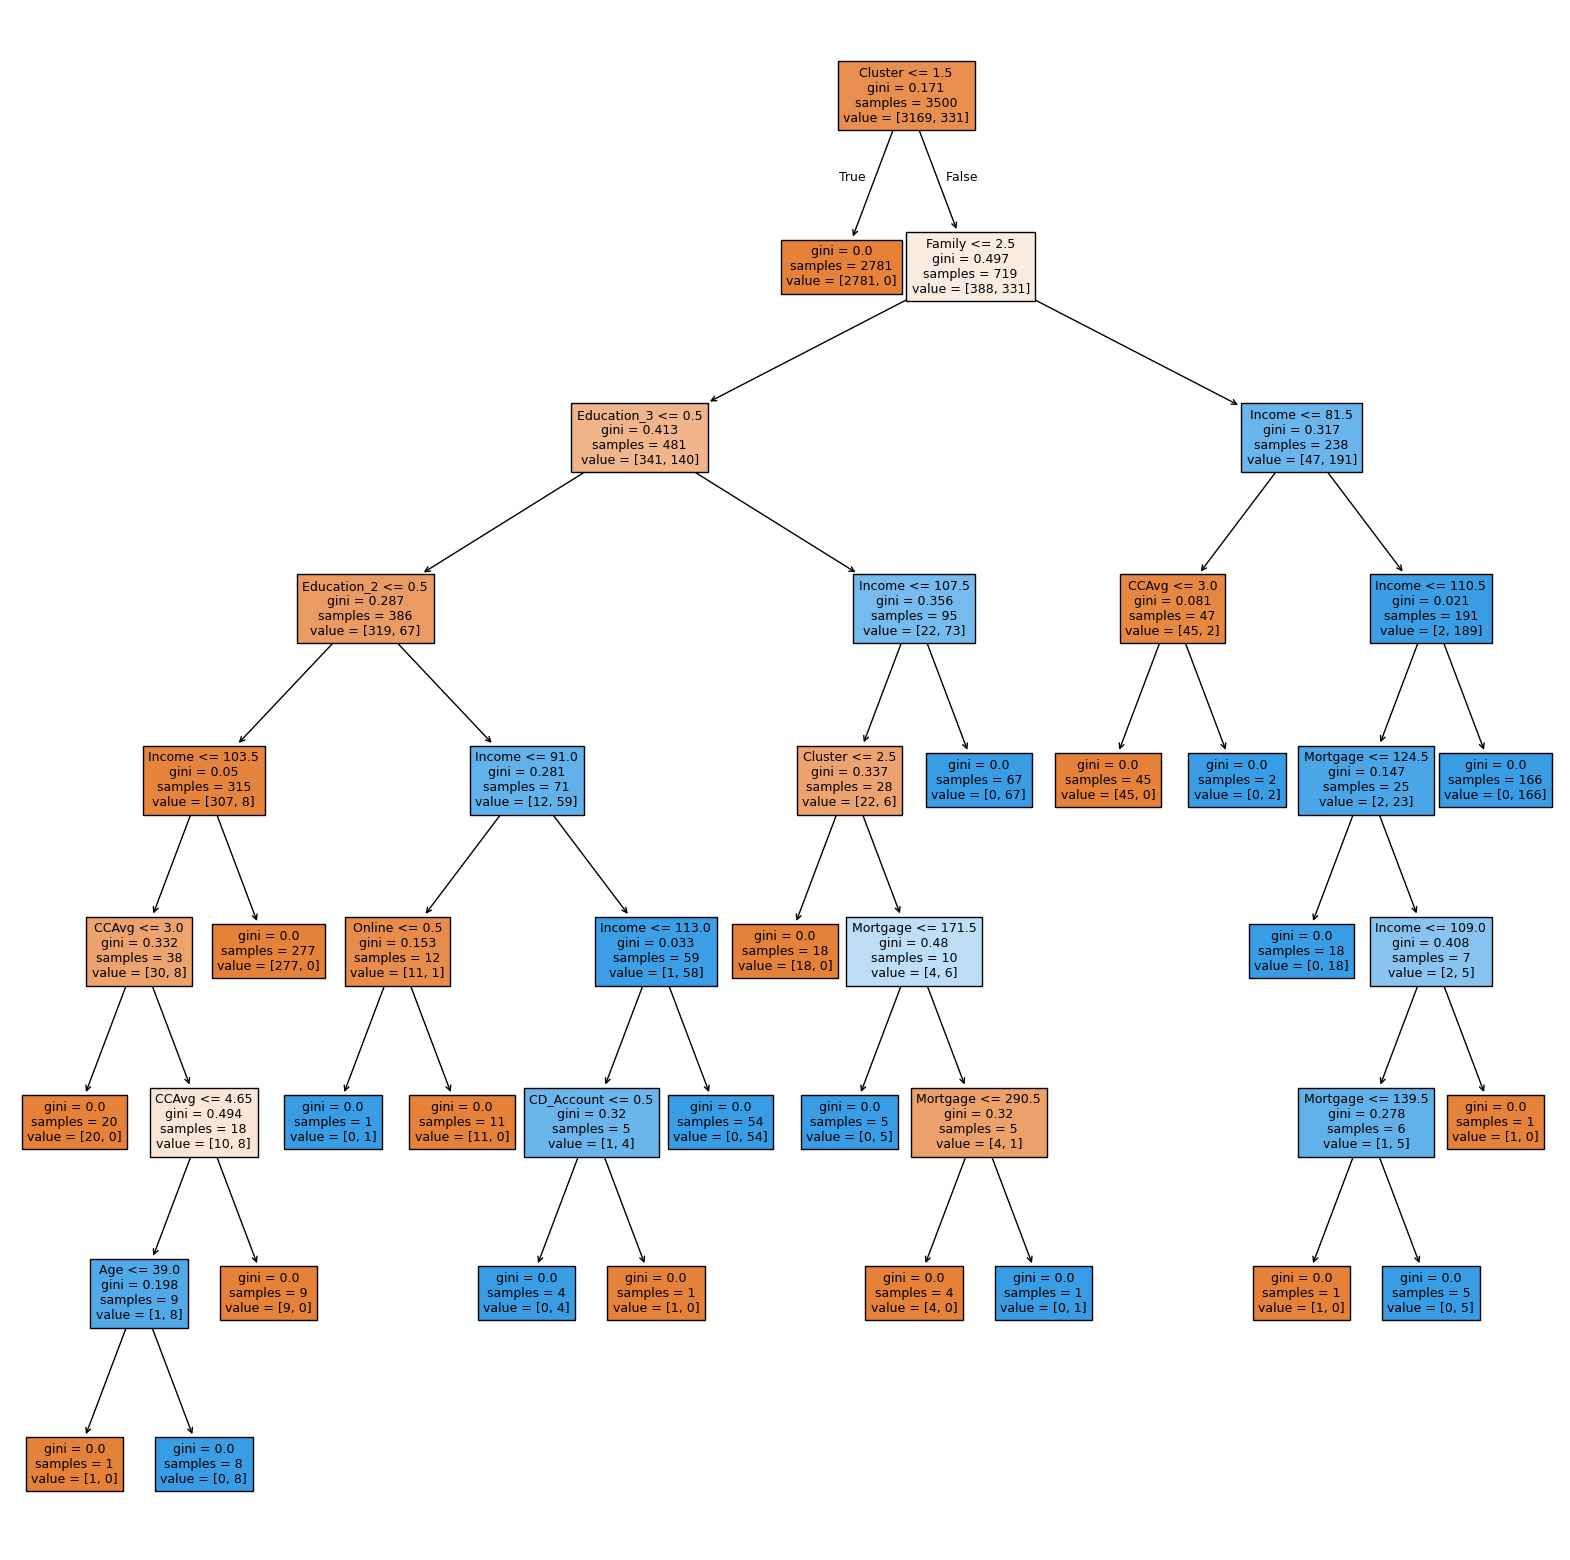

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20,20))
out = plot_tree(tree1,
                feature_names=feature_names,
                filled=True,
                fontsize=9,
                node_ids=False,
                class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

we can see it is a very complex tree.

In [ ]:
from sklearn.tree import export_text
from sklearn.tree import _tree

In [ ]:
print(
    export_text(
        tree1,
        feature_names=feature_names,
        max_depth=3,
        show_weights=True,
    )
)

|--- Cluster <= 1.50
|   |--- weights: [2781.00, 0.00] class: 0
|--- Cluster >  1.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 107.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- Income >  107.50
|   |   |   |   |--- weights: [0.00, 67.00] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 81.50
|   |   |   |--- CCAvg <= 3.00
|   |   |   |   |--- weights: [45.00, 0.00] class: 0
|   |   |   |--- CCAvg >  3.00
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- Income >  81.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [0.00, 166.00] class: 1



####Decision Tree - Pre-Pruning

In [ ]:
#pre-pruning
max_depth_values = np.arange(2,11,2)
max_leaf_nodes_values = np.arange(10,51,10)
min_samples_split_values = np.arange(10,51,10)

best_estimator = None
best_score_diff = float('inf')

for max_depth in max_depth_values:
  for max_leaf_nodes in max_leaf_nodes_values:
    for min_samples_split in min_samples_split_values:
      estimator = DecisionTreeClassifier(
          max_depth=max_depth,
          max_leaf_nodes=max_leaf_nodes,
          min_samples_split=min_samples_split,
          random_state=42
      )
      estimator.fit(X_train, y_train)
      y_train_pred = estimator.predict(X_train)
      y_test_pred = estimator.predict(X_test)

      train_f1_score = f1_score(y_train, y_train_pred)
      test_f1_score = f1_score(y_test, y_test_pred)
      score_diff = abs(train_f1_score - test_f1_score)

      if score_diff < best_score_diff:
        best_estimator = estimator
        best_score_diff = score_diff

print("Best Estimator:", best_estimator)
print("Best Score Difference:", best_score_diff)

Best Estimator: DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=50,
                       random_state=42)
Best Score Difference: 0.008599508599508643


the diffrence is minimized.

In [ ]:

tree2 = best_estimator
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=50,
                       random_state=42)

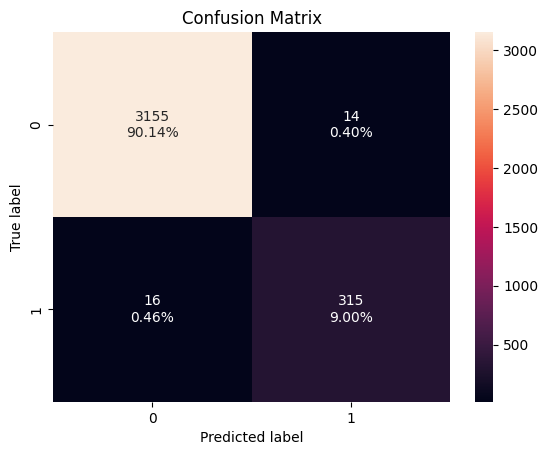

In [ ]:
plot_confusion_matrix(tree2, X_train, y_train)

there are some mistiakes and good performance.

In [ ]:
tree2_train_perf = model_performance_classification(tree2, X_train, y_train)
tree2_train_perf

Accuracy    Recall  Precision        F1
0  0.991429  0.951662   0.957447  0.954545

99% of the time the model is getting it right during training.

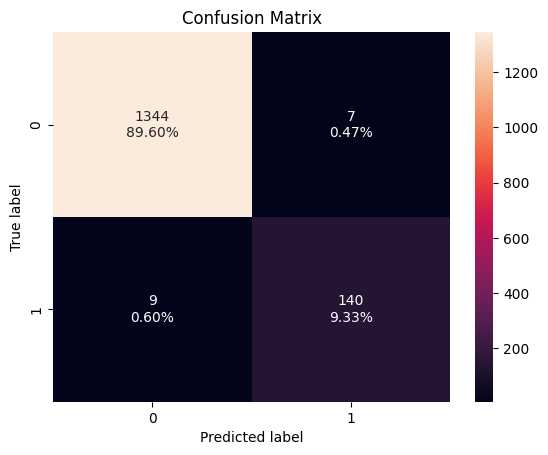

In [ ]:
plot_confusion_matrix(tree2, X_test, y_test)

about 98% of the time, the model answered correctly.

In [ ]:
tree2_test_perf = model_performance_classification(tree2, X_test, y_test)
tree2_test_perf

Accuracy    Recall  Precision        F1
0  0.989333  0.939597   0.952381  0.945946

98% of the time, this model is accurate during testing.

my model performs similarly between training and testing.

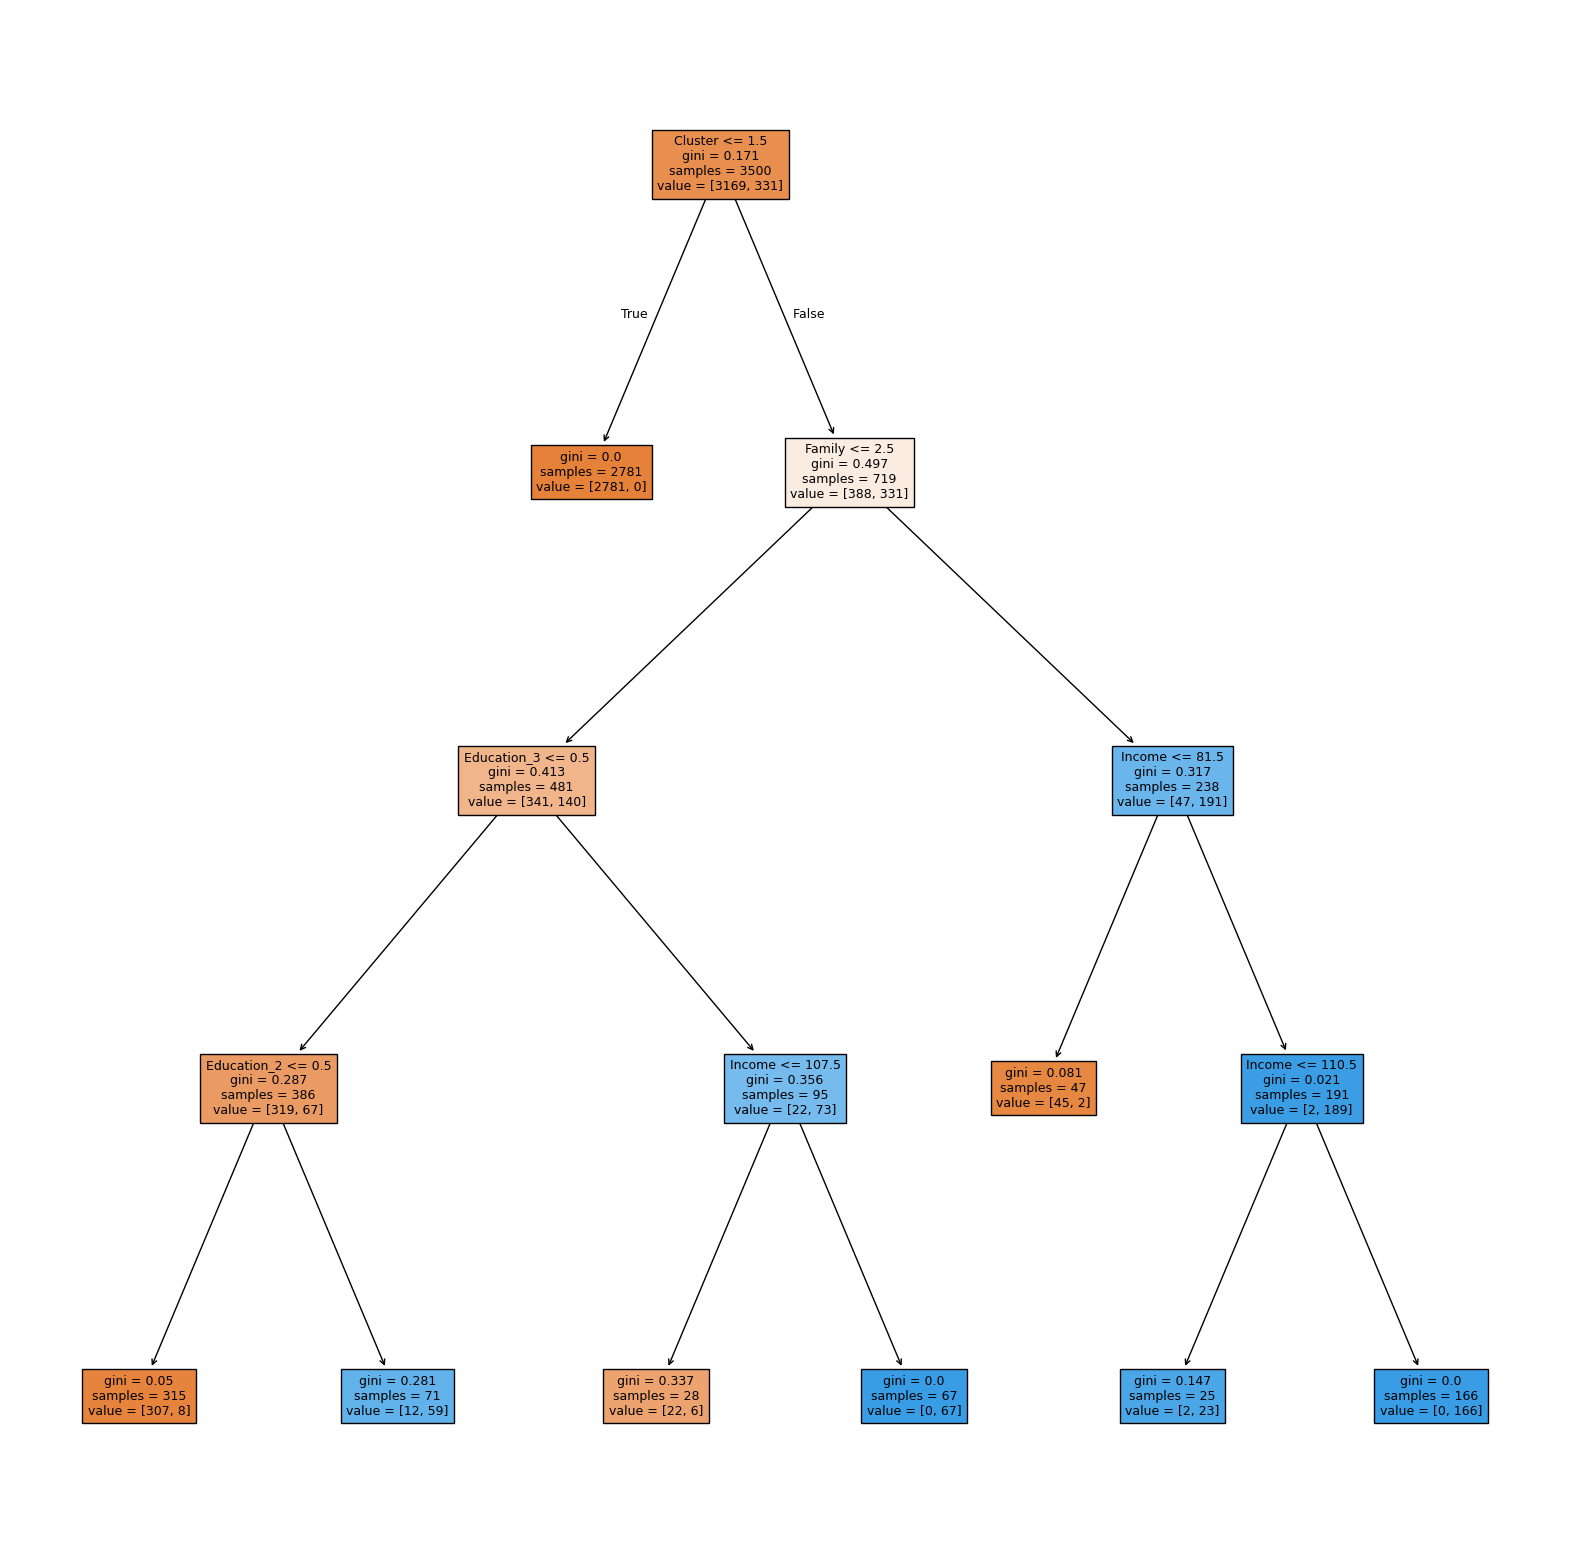

In [ ]:
#visualizing decision tree:
feature_names = list(X_train.columns)
plt.figure(figsize=(20,20))
out = plot_tree(tree2,
                feature_names=feature_names,
                filled=True,
                fontsize=9,
                node_ids=False,
                class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

this is a simple tree, which is less complex than the previous one.

In [ ]:
print(
    export_text(
        tree2,
        feature_names=feature_names,
        show_weights=True,
    )
)

|--- Cluster <= 1.50
|   |--- weights: [2781.00, 0.00] class: 0
|--- Cluster >  1.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [307.00, 8.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [12.00, 59.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 107.50
|   |   |   |   |--- weights: [22.00, 6.00] class: 0
|   |   |   |--- Income >  107.50
|   |   |   |   |--- weights: [0.00, 67.00] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 81.50
|   |   |   |--- weights: [45.00, 2.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- weights: [2.00, 23.00] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [0.00, 166.00] class: 1



class 0 = not approved.
class 1 = yes approved.

####Decision Tree - Post-Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas= abs(path.ccp_alphas)
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000281    0.000562
2     0.000283    0.001693
3     0.000457    0.002150
4     0.000508    0.002658
5     0.000524    0.003182
6     0.000914    0.004096
7     0.001094    0.005190
8     0.001316    0.009137
9     0.001322    0.010460
10    0.004613    0.015073
11    0.006966    0.022039
12    0.018451    0.058940
13    0.019328    0.078269
14    0.023800    0.102069
15    0.069187    0.171255

the goal is to make the impurity low.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

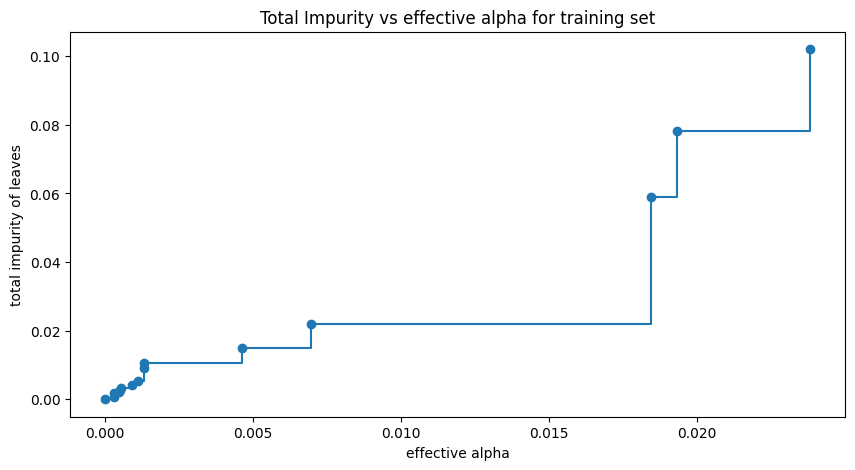

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
print("number of nodes in the last tree is {} with ccp_alpha {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]
))

number of nodes in the last tree is 1 with ccp_alpha 0.06918660066418782


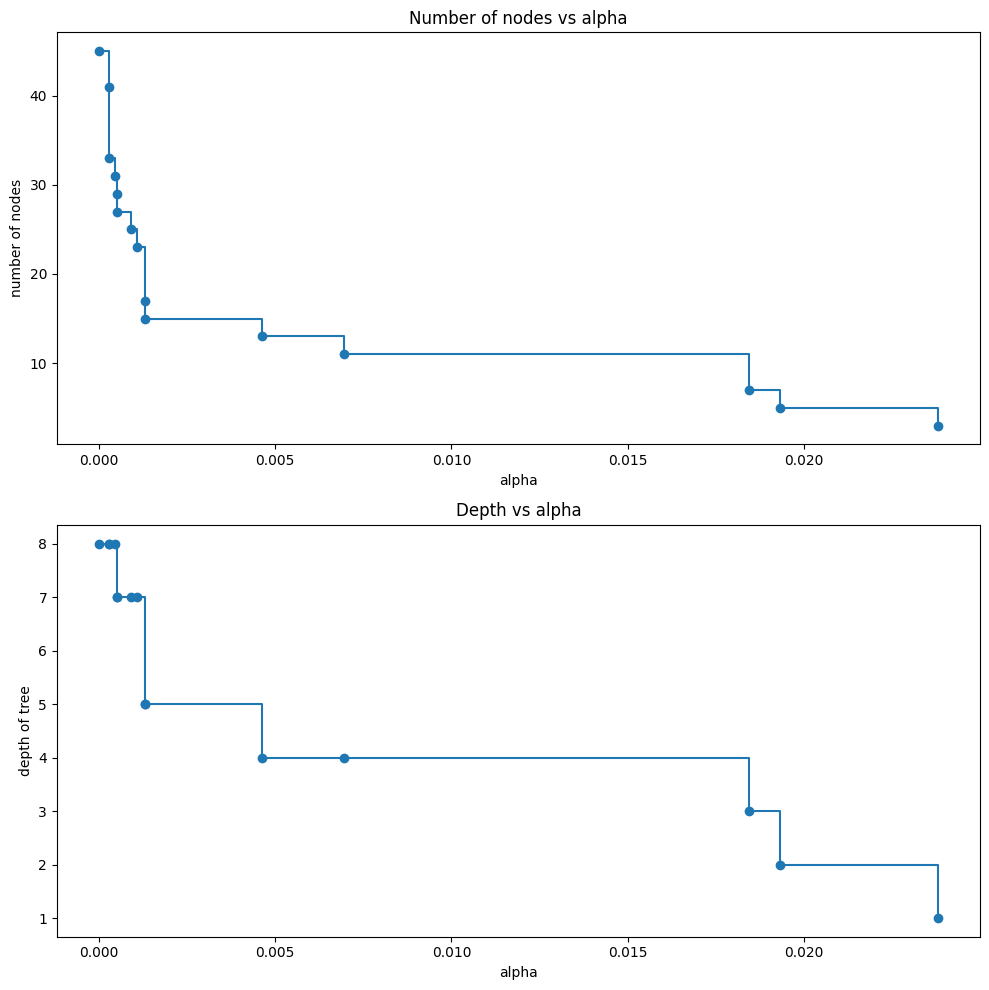

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_ylabel("depth of tree")
ax[1].set_xlabel("alpha")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

as alpha increasing, pruining is happing as we increasing depth.

In [ ]:
train_f1_scores = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    f1_train = f1_score(y_train, pred_train)
    train_f1_scores.append(f1_train)

test_f1_scores = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    f1_test = f1_score(y_test, pred_test)
    test_f1_scores.append(f1_test)

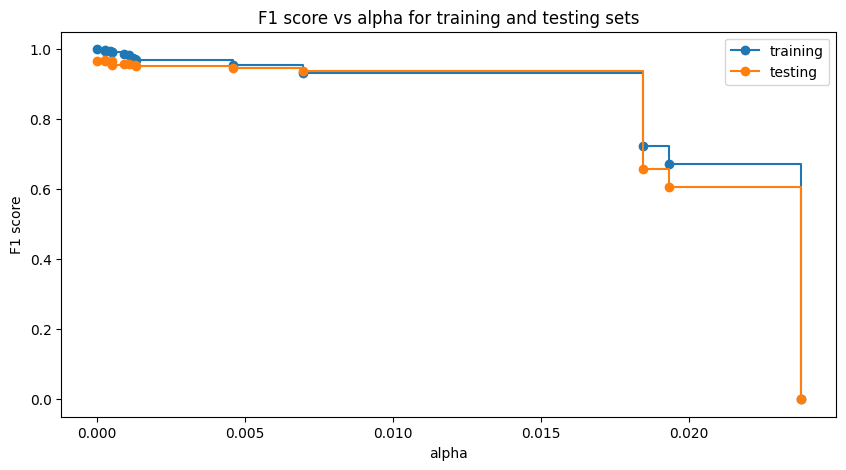

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 score vs alpha for training and testing sets")


ax.plot(ccp_alphas, train_f1_scores, marker='o', label="training", drawstyle="steps-post")
ax.plot(ccp_alphas, test_f1_scores, marker='o', label="testing", drawstyle="steps-post")
ax.legend()
plt.show()

as alpha becomes larger, it becomes more complecated tree.

In [ ]:
index_best_model = np.argmax(test_f1_scores)
tree3 = clfs[index_best_model]
tree3

DecisionTreeClassifier(ccp_alpha=0.0002808716707021793, random_state=42)

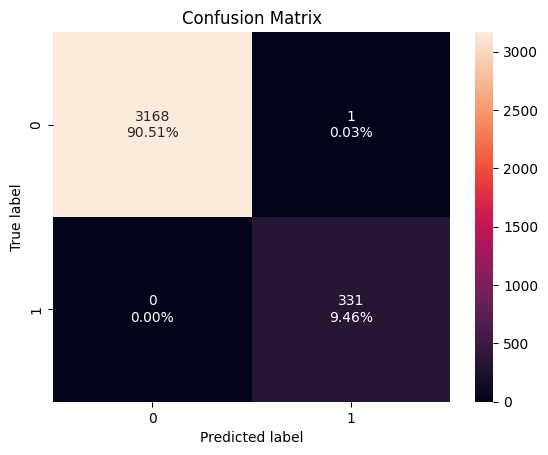

In [ ]:
#model evaluation
plot_confusion_matrix(tree3, X_train, y_train)

100% of the time, model is right.

In [ ]:
tree3_train_perf = model_performance_classification(tree3, X_train, y_train)
tree3_train_perf

Accuracy  Recall  Precision        F1
0  0.999714     1.0   0.996988  0.998492

100% accuracy

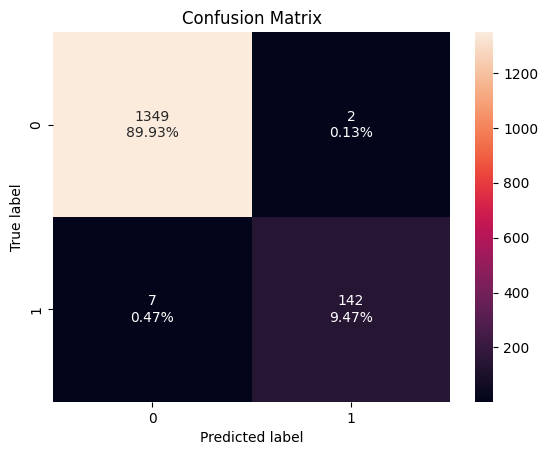

In [ ]:
plot_confusion_matrix(tree3, X_test, y_test)

about 98% of the time, the model is accurate during testing

In [ ]:
tree3_test_perf = model_performance_classification(tree3, X_test, y_test)
tree3_test_perf

Accuracy   Recall  Precision        F1
0     0.994  0.95302   0.986111  0.969283

about 98% accuracy during test

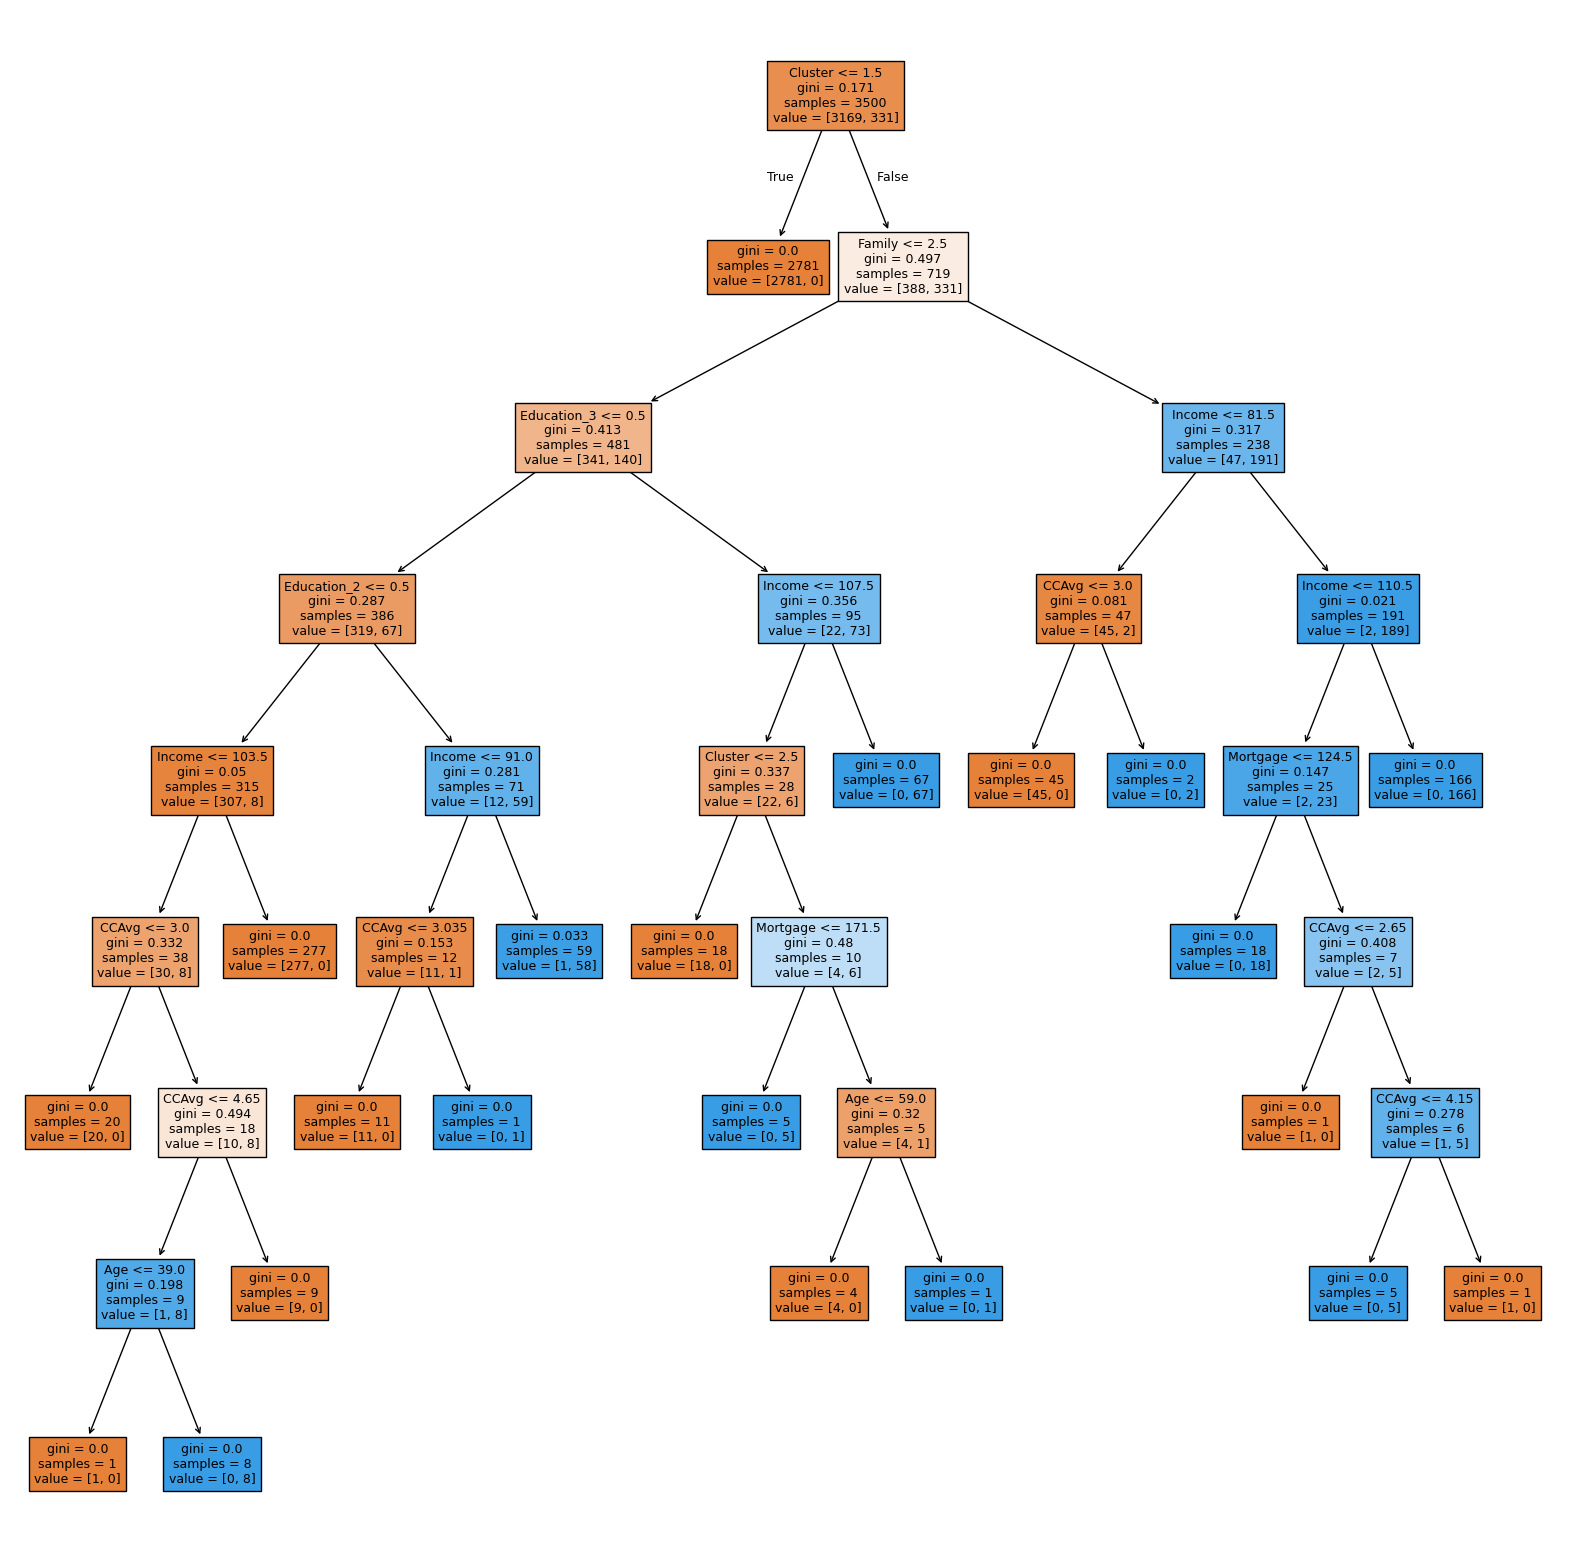

In [ ]:
#visualizing tree3
feature_names = list(X_train.columns)
plt.figure(figsize=(20,20))
out = plot_tree(tree3,
                feature_names=feature_names,
                filled=True,
                fontsize=9,
                node_ids=False,
                class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

more complex than tree2.

In [ ]:
print(
    export_text(
        tree3,
        feature_names=feature_names,
        show_weights=True,
    )
)

|--- Cluster <= 1.50
|   |--- weights: [2781.00, 0.00] class: 0
|--- Cluster >  1.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.00
|   |   |   |   |   |   |--- weights: [20.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.00
|   |   |   |   |   |   |--- CCAvg <= 4.65
|   |   |   |   |   |   |   |--- Age <= 39.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  39.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 8.00] class: 1
|   |   |   |   |   |   |--- CCAvg >  4.65
|   |   |   |   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [277.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 91.00
|   |   |   |   |   |--- CCAvg <= 3.04
|   |   |   |   |   |   |--- weights: [11.00, 0.00] class

post prune tree made it more complex

* tree1: very large with many leefs
* tree2: pre-pruned much smaller and simpler
* tree3: post prune, we pruned alot, however it got more complex.

## Model Performance Comparison and Final Model Selection

In [ ]:
models_train_comp_df = pd.concat(
  [
        tree1_train_perf.T,
        tree2_train_perf.T,
        tree3_train_perf.T,
  ],
  axis=1,
)
models_train_comp_df.columns = [
    "decision tree (sklearn default)",
    "decision tree (pre_pruning)",
    "decision tree (post_pruning)",
]

print("training performance comparision:")
models_train_comp_df


training performance comparision:


decision tree (sklearn default)  decision tree (pre_pruning)  \
Accuracy                               1.0                     0.991429   
Recall                                 1.0                     0.951662   
Precision                              1.0                     0.957447   
F1                                     1.0                     0.954545   

           decision tree (post_pruning)  
Accuracy                       0.999714  
Recall                         1.000000  
Precision                      0.996988  
F1                             0.998492

In [ ]:
models_test_comp_df = pd.concat(
  [
        tree1_test_perf.T,
        tree2_test_perf.T,
        tree3_test_perf.T,
  ],
  axis=1,
)
models_test_comp_df.columns = [
    "decision tree (sklearn default)",
    "decision tree (pre_pruning)",
    "decision tree (post_pruning)",
]
print("testing performance comparision:")
models_test_comp_df

testing performance comparision:


decision tree (sklearn default)  decision tree (pre_pruning)  \
Accuracy                          0.988667                     0.989333   
Recall                            0.906040                     0.939597   
Precision                         0.978261                     0.952381   
F1                                0.940767                     0.945946   

           decision tree (post_pruning)  
Accuracy                       0.994000  
Recall                         0.953020  
Precision                      0.986111  
F1                             0.969283

both the pre-pruned an post-pruned decision trees showed generalized performance.
* the post-pruned decision tree has an about 1.6% less performance on the test set than the training set.
 * this model uses larger features for decision making.
 * this will result in a longer prediction time but it may perform less with unseen data.
* the pre-pruned decision tree has almost the same on training and test sets.
 * this model uses a few features for decision making than the post pruned decision tree.
 * this will result in a slightly shorter prediction time but it's likely to be better with unseen data.
* I will move with pre pruned dicision tree as my final model.

  

## Model Performance Improvement

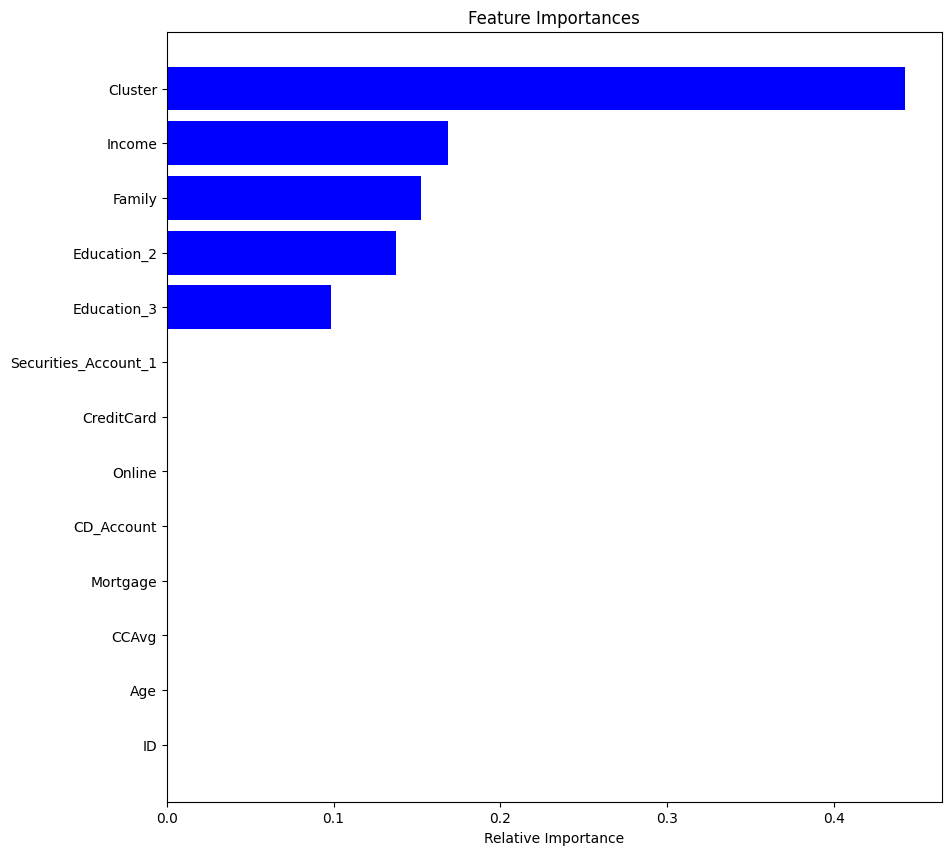

In [ ]:
importances = tree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()

this shows that income is the most important feature for personal loan decision making.

In [ ]:
%%time
applicant_details = X_test.iloc[:1, :].values
approval_prediction = tree2.predict(applicant_details)
print(approval_prediction)

[0]
CPU times: user 3.34 ms, sys: 6 µs, total: 3.35 ms
Wall time: 8.62 ms


this shows the amount of the time after running application thru the predection which shows how fast can the model make the decision.

* the model was able to predict in under half a second

## Actionable Insights and Business Recommendations


* The bank can deploy this model for the initial screening of personal loan applications and provide personalized communication.

* Target customers with higher incomes because they're more interested in personal loans.

* Offer personal loans to customers who already have credit cards with the bank because they're more familiar and they trust the bank already.

* Consider targeting customers based on their education and family size. This can help with relevant campaigns.

* In case of doubts, applications can be sent to manual inspection.

___